In [2]:
import os
from nltk import word_tokenize 
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

In [3]:
y_labels=[]
for a,b,c in os.walk("20_newsgroups/"):
    if(len(b)!=0):
        y_labels.append(b)
y_labels=y_labels[0]

In [4]:
stop_words=stopwords.words('english')
list_of_words={}

In [5]:
i=1
for dir_path,dir_name,file_name in os.walk("20_newsgroups/"):
    print("folder no.: ",i)
    i+=1
    for name in file_name:
            f=open(dir_path+"/"+name,'r',encoding="ISO-8859-1")
            for line in f:
                words=word_tokenize(line)
                for word in words:
                    if word.lower() not in stop_words and word.isalpha():
                        new_word=word.lower()
                        if new_word not in list_of_words:
                            list_of_words[new_word]=1
                        else:
                            list_of_words[new_word]+=1

folder no.:  1
folder no.:  2
folder no.:  3
folder no.:  4
folder no.:  5
folder no.:  6
folder no.:  7
folder no.:  8
folder no.:  9
folder no.:  10
folder no.:  11
folder no.:  12
folder no.:  13
folder no.:  14
folder no.:  15
folder no.:  16
folder no.:  17
folder no.:  18
folder no.:  19
folder no.:  20
folder no.:  21


In [20]:
len(list_of_words.keys())

94855

In [7]:
vocab=sorted(list_of_words.items(),key=lambda x:x[1],reverse=True)
len(vocab)

94855

In [8]:
i=0
final_vocab=[]
for (key,value) in vocab:
    if(i<2000):
        final_vocab.append(key)
    else:
        break
    i+=1

In [28]:
dataset=np.zeros((20,len(final_vocab)),int)
dataset.shape

(20, 2000)

In [125]:
#counting total files, represented by 'i'
i=0
for dir_path,dir_name,file_name in os.walk("20_newsgroups/",topdown=True):
    for folder in dir_name:
        print(folder)
        for a,b,c in os.walk("20_newsgroups/"+folder):
            if(len(c)!=0):
                for file in c:
                    if(file!=".DS_Store"):
                        i+=1
print(i)

talk.politics.mideast
rec.autos
comp.sys.mac.hardware
alt.atheism
rec.sport.baseball
comp.os.ms-windows.misc
rec.sport.hockey
sci.crypt
sci.med
talk.politics.misc
rec.motorcycles
comp.windows.x
comp.graphics
comp.sys.ibm.pc.hardware
sci.electronics
talk.politics.guns
sci.space
soc.religion.christian
misc.forsale
talk.religion.misc
19997


In [137]:
x_train=np.zeros((i,len(final_vocab)),int)

In [132]:
x_train.shape

(19997, 2000)

In [138]:
y_labels=[]

In [139]:
#building the x_train, i.e. going through each document and counting the words. Each row in the dataset implies a new document
rows=0
for dir_path,dir_name,file_name in os.walk("20_newsgroups/",topdown=True):
    for folder in dir_name:
        print(folder)
        for a,b,c in os.walk("20_newsgroups/"+folder):
            if(len(c)!=0):
                for file in c:
                    if(file!=".DS_Store"):
                        f=open("20_newsgroups/"+folder+"/"+file,'r',encoding="ISO-8859-1")
                        for line in f:
                            words=word_tokenize(line)
                            for word in words:
                                if word.lower() in final_vocab:
                                    x_train[rows][final_vocab.index(word.lower())]+=1
                        print("ROW NO. : ", rows)
                        rows+=1

talk.politics.mideast
ROW NO. :  0
ROW NO. :  1
ROW NO. :  2
ROW NO. :  3
ROW NO. :  4
ROW NO. :  5
ROW NO. :  6
ROW NO. :  7
ROW NO. :  8
ROW NO. :  9
ROW NO. :  10
ROW NO. :  11
ROW NO. :  12
ROW NO. :  13
ROW NO. :  14
ROW NO. :  15
ROW NO. :  16
ROW NO. :  17
ROW NO. :  18
ROW NO. :  19
ROW NO. :  20
ROW NO. :  21
ROW NO. :  22
ROW NO. :  23
ROW NO. :  24
ROW NO. :  25
ROW NO. :  26
ROW NO. :  27
ROW NO. :  28
ROW NO. :  29
ROW NO. :  30
ROW NO. :  31
ROW NO. :  32
ROW NO. :  33
ROW NO. :  34
ROW NO. :  35
ROW NO. :  36
ROW NO. :  37
ROW NO. :  38
ROW NO. :  39
ROW NO. :  40
ROW NO. :  41
ROW NO. :  42
ROW NO. :  43
ROW NO. :  44
ROW NO. :  45
ROW NO. :  46
ROW NO. :  47
ROW NO. :  48
ROW NO. :  49
ROW NO. :  50
ROW NO. :  51
ROW NO. :  52
ROW NO. :  53
ROW NO. :  54
ROW NO. :  55
ROW NO. :  56
ROW NO. :  57
ROW NO. :  58
ROW NO. :  59
ROW NO. :  60
ROW NO. :  61
ROW NO. :  62
ROW NO. :  63
ROW NO. :  64
ROW NO. :  65
ROW NO. :  66
ROW NO. :  67
ROW NO. :  68
ROW NO. :  69
ROW NO. 

ROW NO. :  553
ROW NO. :  554
ROW NO. :  555
ROW NO. :  556
ROW NO. :  557
ROW NO. :  558
ROW NO. :  559
ROW NO. :  560
ROW NO. :  561
ROW NO. :  562
ROW NO. :  563
ROW NO. :  564
ROW NO. :  565
ROW NO. :  566
ROW NO. :  567
ROW NO. :  568
ROW NO. :  569
ROW NO. :  570
ROW NO. :  571
ROW NO. :  572
ROW NO. :  573
ROW NO. :  574
ROW NO. :  575
ROW NO. :  576
ROW NO. :  577
ROW NO. :  578
ROW NO. :  579
ROW NO. :  580
ROW NO. :  581
ROW NO. :  582
ROW NO. :  583
ROW NO. :  584
ROW NO. :  585
ROW NO. :  586
ROW NO. :  587
ROW NO. :  588
ROW NO. :  589
ROW NO. :  590
ROW NO. :  591
ROW NO. :  592
ROW NO. :  593
ROW NO. :  594
ROW NO. :  595
ROW NO. :  596
ROW NO. :  597
ROW NO. :  598
ROW NO. :  599
ROW NO. :  600
ROW NO. :  601
ROW NO. :  602
ROW NO. :  603
ROW NO. :  604
ROW NO. :  605
ROW NO. :  606
ROW NO. :  607
ROW NO. :  608
ROW NO. :  609
ROW NO. :  610
ROW NO. :  611
ROW NO. :  612
ROW NO. :  613
ROW NO. :  614
ROW NO. :  615
ROW NO. :  616
ROW NO. :  617
ROW NO. :  618
ROW NO. : 

ROW NO. :  1097
ROW NO. :  1098
ROW NO. :  1099
ROW NO. :  1100
ROW NO. :  1101
ROW NO. :  1102
ROW NO. :  1103
ROW NO. :  1104
ROW NO. :  1105
ROW NO. :  1106
ROW NO. :  1107
ROW NO. :  1108
ROW NO. :  1109
ROW NO. :  1110
ROW NO. :  1111
ROW NO. :  1112
ROW NO. :  1113
ROW NO. :  1114
ROW NO. :  1115
ROW NO. :  1116
ROW NO. :  1117
ROW NO. :  1118
ROW NO. :  1119
ROW NO. :  1120
ROW NO. :  1121
ROW NO. :  1122
ROW NO. :  1123
ROW NO. :  1124
ROW NO. :  1125
ROW NO. :  1126
ROW NO. :  1127
ROW NO. :  1128
ROW NO. :  1129
ROW NO. :  1130
ROW NO. :  1131
ROW NO. :  1132
ROW NO. :  1133
ROW NO. :  1134
ROW NO. :  1135
ROW NO. :  1136
ROW NO. :  1137
ROW NO. :  1138
ROW NO. :  1139
ROW NO. :  1140
ROW NO. :  1141
ROW NO. :  1142
ROW NO. :  1143
ROW NO. :  1144
ROW NO. :  1145
ROW NO. :  1146
ROW NO. :  1147
ROW NO. :  1148
ROW NO. :  1149
ROW NO. :  1150
ROW NO. :  1151
ROW NO. :  1152
ROW NO. :  1153
ROW NO. :  1154
ROW NO. :  1155
ROW NO. :  1156
ROW NO. :  1157
ROW NO. :  1158
ROW NO. 

ROW NO. :  1617
ROW NO. :  1618
ROW NO. :  1619
ROW NO. :  1620
ROW NO. :  1621
ROW NO. :  1622
ROW NO. :  1623
ROW NO. :  1624
ROW NO. :  1625
ROW NO. :  1626
ROW NO. :  1627
ROW NO. :  1628
ROW NO. :  1629
ROW NO. :  1630
ROW NO. :  1631
ROW NO. :  1632
ROW NO. :  1633
ROW NO. :  1634
ROW NO. :  1635
ROW NO. :  1636
ROW NO. :  1637
ROW NO. :  1638
ROW NO. :  1639
ROW NO. :  1640
ROW NO. :  1641
ROW NO. :  1642
ROW NO. :  1643
ROW NO. :  1644
ROW NO. :  1645
ROW NO. :  1646
ROW NO. :  1647
ROW NO. :  1648
ROW NO. :  1649
ROW NO. :  1650
ROW NO. :  1651
ROW NO. :  1652
ROW NO. :  1653
ROW NO. :  1654
ROW NO. :  1655
ROW NO. :  1656
ROW NO. :  1657
ROW NO. :  1658
ROW NO. :  1659
ROW NO. :  1660
ROW NO. :  1661
ROW NO. :  1662
ROW NO. :  1663
ROW NO. :  1664
ROW NO. :  1665
ROW NO. :  1666
ROW NO. :  1667
ROW NO. :  1668
ROW NO. :  1669
ROW NO. :  1670
ROW NO. :  1671
ROW NO. :  1672
ROW NO. :  1673
ROW NO. :  1674
ROW NO. :  1675
ROW NO. :  1676
ROW NO. :  1677
ROW NO. :  1678
ROW NO. 

ROW NO. :  2129
ROW NO. :  2130
ROW NO. :  2131
ROW NO. :  2132
ROW NO. :  2133
ROW NO. :  2134
ROW NO. :  2135
ROW NO. :  2136
ROW NO. :  2137
ROW NO. :  2138
ROW NO. :  2139
ROW NO. :  2140
ROW NO. :  2141
ROW NO. :  2142
ROW NO. :  2143
ROW NO. :  2144
ROW NO. :  2145
ROW NO. :  2146
ROW NO. :  2147
ROW NO. :  2148
ROW NO. :  2149
ROW NO. :  2150
ROW NO. :  2151
ROW NO. :  2152
ROW NO. :  2153
ROW NO. :  2154
ROW NO. :  2155
ROW NO. :  2156
ROW NO. :  2157
ROW NO. :  2158
ROW NO. :  2159
ROW NO. :  2160
ROW NO. :  2161
ROW NO. :  2162
ROW NO. :  2163
ROW NO. :  2164
ROW NO. :  2165
ROW NO. :  2166
ROW NO. :  2167
ROW NO. :  2168
ROW NO. :  2169
ROW NO. :  2170
ROW NO. :  2171
ROW NO. :  2172
ROW NO. :  2173
ROW NO. :  2174
ROW NO. :  2175
ROW NO. :  2176
ROW NO. :  2177
ROW NO. :  2178
ROW NO. :  2179
ROW NO. :  2180
ROW NO. :  2181
ROW NO. :  2182
ROW NO. :  2183
ROW NO. :  2184
ROW NO. :  2185
ROW NO. :  2186
ROW NO. :  2187
ROW NO. :  2188
ROW NO. :  2189
ROW NO. :  2190
ROW NO. 

ROW NO. :  2647
ROW NO. :  2648
ROW NO. :  2649
ROW NO. :  2650
ROW NO. :  2651
ROW NO. :  2652
ROW NO. :  2653
ROW NO. :  2654
ROW NO. :  2655
ROW NO. :  2656
ROW NO. :  2657
ROW NO. :  2658
ROW NO. :  2659
ROW NO. :  2660
ROW NO. :  2661
ROW NO. :  2662
ROW NO. :  2663
ROW NO. :  2664
ROW NO. :  2665
ROW NO. :  2666
ROW NO. :  2667
ROW NO. :  2668
ROW NO. :  2669
ROW NO. :  2670
ROW NO. :  2671
ROW NO. :  2672
ROW NO. :  2673
ROW NO. :  2674
ROW NO. :  2675
ROW NO. :  2676
ROW NO. :  2677
ROW NO. :  2678
ROW NO. :  2679
ROW NO. :  2680
ROW NO. :  2681
ROW NO. :  2682
ROW NO. :  2683
ROW NO. :  2684
ROW NO. :  2685
ROW NO. :  2686
ROW NO. :  2687
ROW NO. :  2688
ROW NO. :  2689
ROW NO. :  2690
ROW NO. :  2691
ROW NO. :  2692
ROW NO. :  2693
ROW NO. :  2694
ROW NO. :  2695
ROW NO. :  2696
ROW NO. :  2697
ROW NO. :  2698
ROW NO. :  2699
ROW NO. :  2700
ROW NO. :  2701
ROW NO. :  2702
ROW NO. :  2703
ROW NO. :  2704
ROW NO. :  2705
ROW NO. :  2706
ROW NO. :  2707
ROW NO. :  2708
ROW NO. 

ROW NO. :  3165
ROW NO. :  3166
ROW NO. :  3167
ROW NO. :  3168
ROW NO. :  3169
ROW NO. :  3170
ROW NO. :  3171
ROW NO. :  3172
ROW NO. :  3173
ROW NO. :  3174
ROW NO. :  3175
ROW NO. :  3176
ROW NO. :  3177
ROW NO. :  3178
ROW NO. :  3179
ROW NO. :  3180
ROW NO. :  3181
ROW NO. :  3182
ROW NO. :  3183
ROW NO. :  3184
ROW NO. :  3185
ROW NO. :  3186
ROW NO. :  3187
ROW NO. :  3188
ROW NO. :  3189
ROW NO. :  3190
ROW NO. :  3191
ROW NO. :  3192
ROW NO. :  3193
ROW NO. :  3194
ROW NO. :  3195
ROW NO. :  3196
ROW NO. :  3197
ROW NO. :  3198
ROW NO. :  3199
ROW NO. :  3200
ROW NO. :  3201
ROW NO. :  3202
ROW NO. :  3203
ROW NO. :  3204
ROW NO. :  3205
ROW NO. :  3206
ROW NO. :  3207
ROW NO. :  3208
ROW NO. :  3209
ROW NO. :  3210
ROW NO. :  3211
ROW NO. :  3212
ROW NO. :  3213
ROW NO. :  3214
ROW NO. :  3215
ROW NO. :  3216
ROW NO. :  3217
ROW NO. :  3218
ROW NO. :  3219
ROW NO. :  3220
ROW NO. :  3221
ROW NO. :  3222
ROW NO. :  3223
ROW NO. :  3224
ROW NO. :  3225
ROW NO. :  3226
ROW NO. 

ROW NO. :  3680
ROW NO. :  3681
ROW NO. :  3682
ROW NO. :  3683
ROW NO. :  3684
ROW NO. :  3685
ROW NO. :  3686
ROW NO. :  3687
ROW NO. :  3688
ROW NO. :  3689
ROW NO. :  3690
ROW NO. :  3691
ROW NO. :  3692
ROW NO. :  3693
ROW NO. :  3694
ROW NO. :  3695
ROW NO. :  3696
ROW NO. :  3697
ROW NO. :  3698
ROW NO. :  3699
ROW NO. :  3700
ROW NO. :  3701
ROW NO. :  3702
ROW NO. :  3703
ROW NO. :  3704
ROW NO. :  3705
ROW NO. :  3706
ROW NO. :  3707
ROW NO. :  3708
ROW NO. :  3709
ROW NO. :  3710
ROW NO. :  3711
ROW NO. :  3712
ROW NO. :  3713
ROW NO. :  3714
ROW NO. :  3715
ROW NO. :  3716
ROW NO. :  3717
ROW NO. :  3718
ROW NO. :  3719
ROW NO. :  3720
ROW NO. :  3721
ROW NO. :  3722
ROW NO. :  3723
ROW NO. :  3724
ROW NO. :  3725
ROW NO. :  3726
ROW NO. :  3727
ROW NO. :  3728
ROW NO. :  3729
ROW NO. :  3730
ROW NO. :  3731
ROW NO. :  3732
ROW NO. :  3733
ROW NO. :  3734
ROW NO. :  3735
ROW NO. :  3736
ROW NO. :  3737
ROW NO. :  3738
ROW NO. :  3739
ROW NO. :  3740
ROW NO. :  3741
ROW NO. 

ROW NO. :  4202
ROW NO. :  4203
ROW NO. :  4204
ROW NO. :  4205
ROW NO. :  4206
ROW NO. :  4207
ROW NO. :  4208
ROW NO. :  4209
ROW NO. :  4210
ROW NO. :  4211
ROW NO. :  4212
ROW NO. :  4213
ROW NO. :  4214
ROW NO. :  4215
ROW NO. :  4216
ROW NO. :  4217
ROW NO. :  4218
ROW NO. :  4219
ROW NO. :  4220
ROW NO. :  4221
ROW NO. :  4222
ROW NO. :  4223
ROW NO. :  4224
ROW NO. :  4225
ROW NO. :  4226
ROW NO. :  4227
ROW NO. :  4228
ROW NO. :  4229
ROW NO. :  4230
ROW NO. :  4231
ROW NO. :  4232
ROW NO. :  4233
ROW NO. :  4234
ROW NO. :  4235
ROW NO. :  4236
ROW NO. :  4237
ROW NO. :  4238
ROW NO. :  4239
ROW NO. :  4240
ROW NO. :  4241
ROW NO. :  4242
ROW NO. :  4243
ROW NO. :  4244
ROW NO. :  4245
ROW NO. :  4246
ROW NO. :  4247
ROW NO. :  4248
ROW NO. :  4249
ROW NO. :  4250
ROW NO. :  4251
ROW NO. :  4252
ROW NO. :  4253
ROW NO. :  4254
ROW NO. :  4255
ROW NO. :  4256
ROW NO. :  4257
ROW NO. :  4258
ROW NO. :  4259
ROW NO. :  4260
ROW NO. :  4261
ROW NO. :  4262
ROW NO. :  4263
ROW NO. 

ROW NO. :  4716
ROW NO. :  4717
ROW NO. :  4718
ROW NO. :  4719
ROW NO. :  4720
ROW NO. :  4721
ROW NO. :  4722
ROW NO. :  4723
ROW NO. :  4724
ROW NO. :  4725
ROW NO. :  4726
ROW NO. :  4727
ROW NO. :  4728
ROW NO. :  4729
ROW NO. :  4730
ROW NO. :  4731
ROW NO. :  4732
ROW NO. :  4733
ROW NO. :  4734
ROW NO. :  4735
ROW NO. :  4736
ROW NO. :  4737
ROW NO. :  4738
ROW NO. :  4739
ROW NO. :  4740
ROW NO. :  4741
ROW NO. :  4742
ROW NO. :  4743
ROW NO. :  4744
ROW NO. :  4745
ROW NO. :  4746
ROW NO. :  4747
ROW NO. :  4748
ROW NO. :  4749
ROW NO. :  4750
ROW NO. :  4751
ROW NO. :  4752
ROW NO. :  4753
ROW NO. :  4754
ROW NO. :  4755
ROW NO. :  4756
ROW NO. :  4757
ROW NO. :  4758
ROW NO. :  4759
ROW NO. :  4760
ROW NO. :  4761
ROW NO. :  4762
ROW NO. :  4763
ROW NO. :  4764
ROW NO. :  4765
ROW NO. :  4766
ROW NO. :  4767
ROW NO. :  4768
ROW NO. :  4769
ROW NO. :  4770
ROW NO. :  4771
ROW NO. :  4772
ROW NO. :  4773
ROW NO. :  4774
ROW NO. :  4775
ROW NO. :  4776
ROW NO. :  4777
ROW NO. 

ROW NO. :  5237
ROW NO. :  5238
ROW NO. :  5239
ROW NO. :  5240
ROW NO. :  5241
ROW NO. :  5242
ROW NO. :  5243
ROW NO. :  5244
ROW NO. :  5245
ROW NO. :  5246
ROW NO. :  5247
ROW NO. :  5248
ROW NO. :  5249
ROW NO. :  5250
ROW NO. :  5251
ROW NO. :  5252
ROW NO. :  5253
ROW NO. :  5254
ROW NO. :  5255
ROW NO. :  5256
ROW NO. :  5257
ROW NO. :  5258
ROW NO. :  5259
ROW NO. :  5260
ROW NO. :  5261
ROW NO. :  5262
ROW NO. :  5263
ROW NO. :  5264
ROW NO. :  5265
ROW NO. :  5266
ROW NO. :  5267
ROW NO. :  5268
ROW NO. :  5269
ROW NO. :  5270
ROW NO. :  5271
ROW NO. :  5272
ROW NO. :  5273
ROW NO. :  5274
ROW NO. :  5275
ROW NO. :  5276
ROW NO. :  5277
ROW NO. :  5278
ROW NO. :  5279
ROW NO. :  5280
ROW NO. :  5281
ROW NO. :  5282
ROW NO. :  5283
ROW NO. :  5284
ROW NO. :  5285
ROW NO. :  5286
ROW NO. :  5287
ROW NO. :  5288
ROW NO. :  5289
ROW NO. :  5290
ROW NO. :  5291
ROW NO. :  5292
ROW NO. :  5293
ROW NO. :  5294
ROW NO. :  5295
ROW NO. :  5296
ROW NO. :  5297
ROW NO. :  5298
ROW NO. 

ROW NO. :  5750
ROW NO. :  5751
ROW NO. :  5752
ROW NO. :  5753
ROW NO. :  5754
ROW NO. :  5755
ROW NO. :  5756
ROW NO. :  5757
ROW NO. :  5758
ROW NO. :  5759
ROW NO. :  5760
ROW NO. :  5761
ROW NO. :  5762
ROW NO. :  5763
ROW NO. :  5764
ROW NO. :  5765
ROW NO. :  5766
ROW NO. :  5767
ROW NO. :  5768
ROW NO. :  5769
ROW NO. :  5770
ROW NO. :  5771
ROW NO. :  5772
ROW NO. :  5773
ROW NO. :  5774
ROW NO. :  5775
ROW NO. :  5776
ROW NO. :  5777
ROW NO. :  5778
ROW NO. :  5779
ROW NO. :  5780
ROW NO. :  5781
ROW NO. :  5782
ROW NO. :  5783
ROW NO. :  5784
ROW NO. :  5785
ROW NO. :  5786
ROW NO. :  5787
ROW NO. :  5788
ROW NO. :  5789
ROW NO. :  5790
ROW NO. :  5791
ROW NO. :  5792
ROW NO. :  5793
ROW NO. :  5794
ROW NO. :  5795
ROW NO. :  5796
ROW NO. :  5797
ROW NO. :  5798
ROW NO. :  5799
ROW NO. :  5800
ROW NO. :  5801
ROW NO. :  5802
ROW NO. :  5803
ROW NO. :  5804
ROW NO. :  5805
ROW NO. :  5806
ROW NO. :  5807
ROW NO. :  5808
ROW NO. :  5809
ROW NO. :  5810
ROW NO. :  5811
ROW NO. 

ROW NO. :  6270
ROW NO. :  6271
ROW NO. :  6272
ROW NO. :  6273
ROW NO. :  6274
ROW NO. :  6275
ROW NO. :  6276
ROW NO. :  6277
ROW NO. :  6278
ROW NO. :  6279
ROW NO. :  6280
ROW NO. :  6281
ROW NO. :  6282
ROW NO. :  6283
ROW NO. :  6284
ROW NO. :  6285
ROW NO. :  6286
ROW NO. :  6287
ROW NO. :  6288
ROW NO. :  6289
ROW NO. :  6290
ROW NO. :  6291
ROW NO. :  6292
ROW NO. :  6293
ROW NO. :  6294
ROW NO. :  6295
ROW NO. :  6296
ROW NO. :  6297
ROW NO. :  6298
ROW NO. :  6299
ROW NO. :  6300
ROW NO. :  6301
ROW NO. :  6302
ROW NO. :  6303
ROW NO. :  6304
ROW NO. :  6305
ROW NO. :  6306
ROW NO. :  6307
ROW NO. :  6308
ROW NO. :  6309
ROW NO. :  6310
ROW NO. :  6311
ROW NO. :  6312
ROW NO. :  6313
ROW NO. :  6314
ROW NO. :  6315
ROW NO. :  6316
ROW NO. :  6317
ROW NO. :  6318
ROW NO. :  6319
ROW NO. :  6320
ROW NO. :  6321
ROW NO. :  6322
ROW NO. :  6323
ROW NO. :  6324
ROW NO. :  6325
ROW NO. :  6326
ROW NO. :  6327
ROW NO. :  6328
ROW NO. :  6329
ROW NO. :  6330
ROW NO. :  6331
ROW NO. 

ROW NO. :  6789
ROW NO. :  6790
ROW NO. :  6791
ROW NO. :  6792
ROW NO. :  6793
ROW NO. :  6794
ROW NO. :  6795
ROW NO. :  6796
ROW NO. :  6797
ROW NO. :  6798
ROW NO. :  6799
ROW NO. :  6800
ROW NO. :  6801
ROW NO. :  6802
ROW NO. :  6803
ROW NO. :  6804
ROW NO. :  6805
ROW NO. :  6806
ROW NO. :  6807
ROW NO. :  6808
ROW NO. :  6809
ROW NO. :  6810
ROW NO. :  6811
ROW NO. :  6812
ROW NO. :  6813
ROW NO. :  6814
ROW NO. :  6815
ROW NO. :  6816
ROW NO. :  6817
ROW NO. :  6818
ROW NO. :  6819
ROW NO. :  6820
ROW NO. :  6821
ROW NO. :  6822
ROW NO. :  6823
ROW NO. :  6824
ROW NO. :  6825
ROW NO. :  6826
ROW NO. :  6827
ROW NO. :  6828
ROW NO. :  6829
ROW NO. :  6830
ROW NO. :  6831
ROW NO. :  6832
ROW NO. :  6833
ROW NO. :  6834
ROW NO. :  6835
ROW NO. :  6836
ROW NO. :  6837
ROW NO. :  6838
ROW NO. :  6839
ROW NO. :  6840
ROW NO. :  6841
ROW NO. :  6842
ROW NO. :  6843
ROW NO. :  6844
ROW NO. :  6845
ROW NO. :  6846
ROW NO. :  6847
ROW NO. :  6848
ROW NO. :  6849
ROW NO. :  6850
ROW NO. 

ROW NO. :  7301
ROW NO. :  7302
ROW NO. :  7303
ROW NO. :  7304
ROW NO. :  7305
ROW NO. :  7306
ROW NO. :  7307
ROW NO. :  7308
ROW NO. :  7309
ROW NO. :  7310
ROW NO. :  7311
ROW NO. :  7312
ROW NO. :  7313
ROW NO. :  7314
ROW NO. :  7315
ROW NO. :  7316
ROW NO. :  7317
ROW NO. :  7318
ROW NO. :  7319
ROW NO. :  7320
ROW NO. :  7321
ROW NO. :  7322
ROW NO. :  7323
ROW NO. :  7324
ROW NO. :  7325
ROW NO. :  7326
ROW NO. :  7327
ROW NO. :  7328
ROW NO. :  7329
ROW NO. :  7330
ROW NO. :  7331
ROW NO. :  7332
ROW NO. :  7333
ROW NO. :  7334
ROW NO. :  7335
ROW NO. :  7336
ROW NO. :  7337
ROW NO. :  7338
ROW NO. :  7339
ROW NO. :  7340
ROW NO. :  7341
ROW NO. :  7342
ROW NO. :  7343
ROW NO. :  7344
ROW NO. :  7345
ROW NO. :  7346
ROW NO. :  7347
ROW NO. :  7348
ROW NO. :  7349
ROW NO. :  7350
ROW NO. :  7351
ROW NO. :  7352
ROW NO. :  7353
ROW NO. :  7354
ROW NO. :  7355
ROW NO. :  7356
ROW NO. :  7357
ROW NO. :  7358
ROW NO. :  7359
ROW NO. :  7360
ROW NO. :  7361
ROW NO. :  7362
ROW NO. 

ROW NO. :  7818
ROW NO. :  7819
ROW NO. :  7820
ROW NO. :  7821
ROW NO. :  7822
ROW NO. :  7823
ROW NO. :  7824
ROW NO. :  7825
ROW NO. :  7826
ROW NO. :  7827
ROW NO. :  7828
ROW NO. :  7829
ROW NO. :  7830
ROW NO. :  7831
ROW NO. :  7832
ROW NO. :  7833
ROW NO. :  7834
ROW NO. :  7835
ROW NO. :  7836
ROW NO. :  7837
ROW NO. :  7838
ROW NO. :  7839
ROW NO. :  7840
ROW NO. :  7841
ROW NO. :  7842
ROW NO. :  7843
ROW NO. :  7844
ROW NO. :  7845
ROW NO. :  7846
ROW NO. :  7847
ROW NO. :  7848
ROW NO. :  7849
ROW NO. :  7850
ROW NO. :  7851
ROW NO. :  7852
ROW NO. :  7853
ROW NO. :  7854
ROW NO. :  7855
ROW NO. :  7856
ROW NO. :  7857
ROW NO. :  7858
ROW NO. :  7859
ROW NO. :  7860
ROW NO. :  7861
ROW NO. :  7862
ROW NO. :  7863
ROW NO. :  7864
ROW NO. :  7865
ROW NO. :  7866
ROW NO. :  7867
ROW NO. :  7868
ROW NO. :  7869
ROW NO. :  7870
ROW NO. :  7871
ROW NO. :  7872
ROW NO. :  7873
ROW NO. :  7874
ROW NO. :  7875
ROW NO. :  7876
ROW NO. :  7877
ROW NO. :  7878
ROW NO. :  7879
ROW NO. 

ROW NO. :  8333
ROW NO. :  8334
ROW NO. :  8335
ROW NO. :  8336
ROW NO. :  8337
ROW NO. :  8338
ROW NO. :  8339
ROW NO. :  8340
ROW NO. :  8341
ROW NO. :  8342
ROW NO. :  8343
ROW NO. :  8344
ROW NO. :  8345
ROW NO. :  8346
ROW NO. :  8347
ROW NO. :  8348
ROW NO. :  8349
ROW NO. :  8350
ROW NO. :  8351
ROW NO. :  8352
ROW NO. :  8353
ROW NO. :  8354
ROW NO. :  8355
ROW NO. :  8356
ROW NO. :  8357
ROW NO. :  8358
ROW NO. :  8359
ROW NO. :  8360
ROW NO. :  8361
ROW NO. :  8362
ROW NO. :  8363
ROW NO. :  8364
ROW NO. :  8365
ROW NO. :  8366
ROW NO. :  8367
ROW NO. :  8368
ROW NO. :  8369
ROW NO. :  8370
ROW NO. :  8371
ROW NO. :  8372
ROW NO. :  8373
ROW NO. :  8374
ROW NO. :  8375
ROW NO. :  8376
ROW NO. :  8377
ROW NO. :  8378
ROW NO. :  8379
ROW NO. :  8380
ROW NO. :  8381
ROW NO. :  8382
ROW NO. :  8383
ROW NO. :  8384
ROW NO. :  8385
ROW NO. :  8386
ROW NO. :  8387
ROW NO. :  8388
ROW NO. :  8389
ROW NO. :  8390
ROW NO. :  8391
ROW NO. :  8392
ROW NO. :  8393
ROW NO. :  8394
ROW NO. 

ROW NO. :  8857
ROW NO. :  8858
ROW NO. :  8859
ROW NO. :  8860
ROW NO. :  8861
ROW NO. :  8862
ROW NO. :  8863
ROW NO. :  8864
ROW NO. :  8865
ROW NO. :  8866
ROW NO. :  8867
ROW NO. :  8868
ROW NO. :  8869
ROW NO. :  8870
ROW NO. :  8871
ROW NO. :  8872
ROW NO. :  8873
ROW NO. :  8874
ROW NO. :  8875
ROW NO. :  8876
ROW NO. :  8877
ROW NO. :  8878
ROW NO. :  8879
ROW NO. :  8880
ROW NO. :  8881
ROW NO. :  8882
ROW NO. :  8883
ROW NO. :  8884
ROW NO. :  8885
ROW NO. :  8886
ROW NO. :  8887
ROW NO. :  8888
ROW NO. :  8889
ROW NO. :  8890
ROW NO. :  8891
ROW NO. :  8892
ROW NO. :  8893
ROW NO. :  8894
ROW NO. :  8895
ROW NO. :  8896
ROW NO. :  8897
ROW NO. :  8898
ROW NO. :  8899
ROW NO. :  8900
ROW NO. :  8901
ROW NO. :  8902
ROW NO. :  8903
ROW NO. :  8904
ROW NO. :  8905
ROW NO. :  8906
ROW NO. :  8907
ROW NO. :  8908
ROW NO. :  8909
ROW NO. :  8910
ROW NO. :  8911
ROW NO. :  8912
ROW NO. :  8913
ROW NO. :  8914
ROW NO. :  8915
ROW NO. :  8916
ROW NO. :  8917
ROW NO. :  8918
ROW NO. 

ROW NO. :  9369
ROW NO. :  9370
ROW NO. :  9371
ROW NO. :  9372
ROW NO. :  9373
ROW NO. :  9374
ROW NO. :  9375
ROW NO. :  9376
ROW NO. :  9377
ROW NO. :  9378
ROW NO. :  9379
ROW NO. :  9380
ROW NO. :  9381
ROW NO. :  9382
ROW NO. :  9383
ROW NO. :  9384
ROW NO. :  9385
ROW NO. :  9386
ROW NO. :  9387
ROW NO. :  9388
ROW NO. :  9389
ROW NO. :  9390
ROW NO. :  9391
ROW NO. :  9392
ROW NO. :  9393
ROW NO. :  9394
ROW NO. :  9395
ROW NO. :  9396
ROW NO. :  9397
ROW NO. :  9398
ROW NO. :  9399
ROW NO. :  9400
ROW NO. :  9401
ROW NO. :  9402
ROW NO. :  9403
ROW NO. :  9404
ROW NO. :  9405
ROW NO. :  9406
ROW NO. :  9407
ROW NO. :  9408
ROW NO. :  9409
ROW NO. :  9410
ROW NO. :  9411
ROW NO. :  9412
ROW NO. :  9413
ROW NO. :  9414
ROW NO. :  9415
ROW NO. :  9416
ROW NO. :  9417
ROW NO. :  9418
ROW NO. :  9419
ROW NO. :  9420
ROW NO. :  9421
ROW NO. :  9422
ROW NO. :  9423
ROW NO. :  9424
ROW NO. :  9425
ROW NO. :  9426
ROW NO. :  9427
ROW NO. :  9428
ROW NO. :  9429
ROW NO. :  9430
ROW NO. 

ROW NO. :  9888
ROW NO. :  9889
ROW NO. :  9890
ROW NO. :  9891
ROW NO. :  9892
ROW NO. :  9893
ROW NO. :  9894
ROW NO. :  9895
ROW NO. :  9896
ROW NO. :  9897
ROW NO. :  9898
ROW NO. :  9899
ROW NO. :  9900
ROW NO. :  9901
ROW NO. :  9902
ROW NO. :  9903
ROW NO. :  9904
ROW NO. :  9905
ROW NO. :  9906
ROW NO. :  9907
ROW NO. :  9908
ROW NO. :  9909
ROW NO. :  9910
ROW NO. :  9911
ROW NO. :  9912
ROW NO. :  9913
ROW NO. :  9914
ROW NO. :  9915
ROW NO. :  9916
ROW NO. :  9917
ROW NO. :  9918
ROW NO. :  9919
ROW NO. :  9920
ROW NO. :  9921
ROW NO. :  9922
ROW NO. :  9923
ROW NO. :  9924
ROW NO. :  9925
ROW NO. :  9926
ROW NO. :  9927
ROW NO. :  9928
ROW NO. :  9929
ROW NO. :  9930
ROW NO. :  9931
ROW NO. :  9932
ROW NO. :  9933
ROW NO. :  9934
ROW NO. :  9935
ROW NO. :  9936
ROW NO. :  9937
ROW NO. :  9938
ROW NO. :  9939
ROW NO. :  9940
ROW NO. :  9941
ROW NO. :  9942
ROW NO. :  9943
ROW NO. :  9944
ROW NO. :  9945
ROW NO. :  9946
ROW NO. :  9947
ROW NO. :  9948
ROW NO. :  9949
ROW NO. 

ROW NO. :  10381
ROW NO. :  10382
ROW NO. :  10383
ROW NO. :  10384
ROW NO. :  10385
ROW NO. :  10386
ROW NO. :  10387
ROW NO. :  10388
ROW NO. :  10389
ROW NO. :  10390
ROW NO. :  10391
ROW NO. :  10392
ROW NO. :  10393
ROW NO. :  10394
ROW NO. :  10395
ROW NO. :  10396
ROW NO. :  10397
ROW NO. :  10398
ROW NO. :  10399
ROW NO. :  10400
ROW NO. :  10401
ROW NO. :  10402
ROW NO. :  10403
ROW NO. :  10404
ROW NO. :  10405
ROW NO. :  10406
ROW NO. :  10407
ROW NO. :  10408
ROW NO. :  10409
ROW NO. :  10410
ROW NO. :  10411
ROW NO. :  10412
ROW NO. :  10413
ROW NO. :  10414
ROW NO. :  10415
ROW NO. :  10416
ROW NO. :  10417
ROW NO. :  10418
ROW NO. :  10419
ROW NO. :  10420
ROW NO. :  10421
ROW NO. :  10422
ROW NO. :  10423
ROW NO. :  10424
ROW NO. :  10425
ROW NO. :  10426
ROW NO. :  10427
ROW NO. :  10428
ROW NO. :  10429
ROW NO. :  10430
ROW NO. :  10431
ROW NO. :  10432
ROW NO. :  10433
ROW NO. :  10434
ROW NO. :  10435
ROW NO. :  10436
ROW NO. :  10437
ROW NO. :  10438
ROW NO. :  104

ROW NO. :  10873
ROW NO. :  10874
ROW NO. :  10875
ROW NO. :  10876
ROW NO. :  10877
ROW NO. :  10878
ROW NO. :  10879
ROW NO. :  10880
ROW NO. :  10881
ROW NO. :  10882
ROW NO. :  10883
ROW NO. :  10884
ROW NO. :  10885
ROW NO. :  10886
ROW NO. :  10887
ROW NO. :  10888
ROW NO. :  10889
ROW NO. :  10890
ROW NO. :  10891
ROW NO. :  10892
ROW NO. :  10893
ROW NO. :  10894
ROW NO. :  10895
ROW NO. :  10896
ROW NO. :  10897
ROW NO. :  10898
ROW NO. :  10899
ROW NO. :  10900
ROW NO. :  10901
ROW NO. :  10902
ROW NO. :  10903
ROW NO. :  10904
ROW NO. :  10905
ROW NO. :  10906
ROW NO. :  10907
ROW NO. :  10908
ROW NO. :  10909
ROW NO. :  10910
ROW NO. :  10911
ROW NO. :  10912
ROW NO. :  10913
ROW NO. :  10914
ROW NO. :  10915
ROW NO. :  10916
ROW NO. :  10917
ROW NO. :  10918
ROW NO. :  10919
ROW NO. :  10920
ROW NO. :  10921
ROW NO. :  10922
ROW NO. :  10923
ROW NO. :  10924
ROW NO. :  10925
ROW NO. :  10926
ROW NO. :  10927
ROW NO. :  10928
ROW NO. :  10929
ROW NO. :  10930
ROW NO. :  109

ROW NO. :  11358
ROW NO. :  11359
ROW NO. :  11360
ROW NO. :  11361
ROW NO. :  11362
ROW NO. :  11363
ROW NO. :  11364
ROW NO. :  11365
ROW NO. :  11366
ROW NO. :  11367
ROW NO. :  11368
ROW NO. :  11369
ROW NO. :  11370
ROW NO. :  11371
ROW NO. :  11372
ROW NO. :  11373
ROW NO. :  11374
ROW NO. :  11375
ROW NO. :  11376
ROW NO. :  11377
ROW NO. :  11378
ROW NO. :  11379
ROW NO. :  11380
ROW NO. :  11381
ROW NO. :  11382
ROW NO. :  11383
ROW NO. :  11384
ROW NO. :  11385
ROW NO. :  11386
ROW NO. :  11387
ROW NO. :  11388
ROW NO. :  11389
ROW NO. :  11390
ROW NO. :  11391
ROW NO. :  11392
ROW NO. :  11393
ROW NO. :  11394
ROW NO. :  11395
ROW NO. :  11396
ROW NO. :  11397
ROW NO. :  11398
ROW NO. :  11399
ROW NO. :  11400
ROW NO. :  11401
ROW NO. :  11402
ROW NO. :  11403
ROW NO. :  11404
ROW NO. :  11405
ROW NO. :  11406
ROW NO. :  11407
ROW NO. :  11408
ROW NO. :  11409
ROW NO. :  11410
ROW NO. :  11411
ROW NO. :  11412
ROW NO. :  11413
ROW NO. :  11414
ROW NO. :  11415
ROW NO. :  114

ROW NO. :  11843
ROW NO. :  11844
ROW NO. :  11845
ROW NO. :  11846
ROW NO. :  11847
ROW NO. :  11848
ROW NO. :  11849
ROW NO. :  11850
ROW NO. :  11851
ROW NO. :  11852
ROW NO. :  11853
ROW NO. :  11854
ROW NO. :  11855
ROW NO. :  11856
ROW NO. :  11857
ROW NO. :  11858
ROW NO. :  11859
ROW NO. :  11860
ROW NO. :  11861
ROW NO. :  11862
ROW NO. :  11863
ROW NO. :  11864
ROW NO. :  11865
ROW NO. :  11866
ROW NO. :  11867
ROW NO. :  11868
ROW NO. :  11869
ROW NO. :  11870
ROW NO. :  11871
ROW NO. :  11872
ROW NO. :  11873
ROW NO. :  11874
ROW NO. :  11875
ROW NO. :  11876
ROW NO. :  11877
ROW NO. :  11878
ROW NO. :  11879
ROW NO. :  11880
ROW NO. :  11881
ROW NO. :  11882
ROW NO. :  11883
ROW NO. :  11884
ROW NO. :  11885
ROW NO. :  11886
ROW NO. :  11887
ROW NO. :  11888
ROW NO. :  11889
ROW NO. :  11890
ROW NO. :  11891
ROW NO. :  11892
ROW NO. :  11893
ROW NO. :  11894
ROW NO. :  11895
ROW NO. :  11896
ROW NO. :  11897
ROW NO. :  11898
ROW NO. :  11899
ROW NO. :  11900
ROW NO. :  119

ROW NO. :  12340
ROW NO. :  12341
ROW NO. :  12342
ROW NO. :  12343
ROW NO. :  12344
ROW NO. :  12345
ROW NO. :  12346
ROW NO. :  12347
ROW NO. :  12348
ROW NO. :  12349
ROW NO. :  12350
ROW NO. :  12351
ROW NO. :  12352
ROW NO. :  12353
ROW NO. :  12354
ROW NO. :  12355
ROW NO. :  12356
ROW NO. :  12357
ROW NO. :  12358
ROW NO. :  12359
ROW NO. :  12360
ROW NO. :  12361
ROW NO. :  12362
ROW NO. :  12363
ROW NO. :  12364
ROW NO. :  12365
ROW NO. :  12366
ROW NO. :  12367
ROW NO. :  12368
ROW NO. :  12369
ROW NO. :  12370
ROW NO. :  12371
ROW NO. :  12372
ROW NO. :  12373
ROW NO. :  12374
ROW NO. :  12375
ROW NO. :  12376
ROW NO. :  12377
ROW NO. :  12378
ROW NO. :  12379
ROW NO. :  12380
ROW NO. :  12381
ROW NO. :  12382
ROW NO. :  12383
ROW NO. :  12384
ROW NO. :  12385
ROW NO. :  12386
ROW NO. :  12387
ROW NO. :  12388
ROW NO. :  12389
ROW NO. :  12390
ROW NO. :  12391
ROW NO. :  12392
ROW NO. :  12393
ROW NO. :  12394
ROW NO. :  12395
ROW NO. :  12396
ROW NO. :  12397
ROW NO. :  123

ROW NO. :  12826
ROW NO. :  12827
ROW NO. :  12828
ROW NO. :  12829
ROW NO. :  12830
ROW NO. :  12831
ROW NO. :  12832
ROW NO. :  12833
ROW NO. :  12834
ROW NO. :  12835
ROW NO. :  12836
ROW NO. :  12837
ROW NO. :  12838
ROW NO. :  12839
ROW NO. :  12840
ROW NO. :  12841
ROW NO. :  12842
ROW NO. :  12843
ROW NO. :  12844
ROW NO. :  12845
ROW NO. :  12846
ROW NO. :  12847
ROW NO. :  12848
ROW NO. :  12849
ROW NO. :  12850
ROW NO. :  12851
ROW NO. :  12852
ROW NO. :  12853
ROW NO. :  12854
ROW NO. :  12855
ROW NO. :  12856
ROW NO. :  12857
ROW NO. :  12858
ROW NO. :  12859
ROW NO. :  12860
ROW NO. :  12861
ROW NO. :  12862
ROW NO. :  12863
ROW NO. :  12864
ROW NO. :  12865
ROW NO. :  12866
ROW NO. :  12867
ROW NO. :  12868
ROW NO. :  12869
ROW NO. :  12870
ROW NO. :  12871
ROW NO. :  12872
ROW NO. :  12873
ROW NO. :  12874
ROW NO. :  12875
ROW NO. :  12876
ROW NO. :  12877
ROW NO. :  12878
ROW NO. :  12879
ROW NO. :  12880
ROW NO. :  12881
ROW NO. :  12882
ROW NO. :  12883
ROW NO. :  128

ROW NO. :  13318
ROW NO. :  13319
ROW NO. :  13320
ROW NO. :  13321
ROW NO. :  13322
ROW NO. :  13323
ROW NO. :  13324
ROW NO. :  13325
ROW NO. :  13326
ROW NO. :  13327
ROW NO. :  13328
ROW NO. :  13329
ROW NO. :  13330
ROW NO. :  13331
ROW NO. :  13332
ROW NO. :  13333
ROW NO. :  13334
ROW NO. :  13335
ROW NO. :  13336
ROW NO. :  13337
ROW NO. :  13338
ROW NO. :  13339
ROW NO. :  13340
ROW NO. :  13341
ROW NO. :  13342
ROW NO. :  13343
ROW NO. :  13344
ROW NO. :  13345
ROW NO. :  13346
ROW NO. :  13347
ROW NO. :  13348
ROW NO. :  13349
ROW NO. :  13350
ROW NO. :  13351
ROW NO. :  13352
ROW NO. :  13353
ROW NO. :  13354
ROW NO. :  13355
ROW NO. :  13356
ROW NO. :  13357
ROW NO. :  13358
ROW NO. :  13359
ROW NO. :  13360
ROW NO. :  13361
ROW NO. :  13362
ROW NO. :  13363
ROW NO. :  13364
ROW NO. :  13365
ROW NO. :  13366
ROW NO. :  13367
ROW NO. :  13368
ROW NO. :  13369
ROW NO. :  13370
ROW NO. :  13371
ROW NO. :  13372
ROW NO. :  13373
ROW NO. :  13374
ROW NO. :  13375
ROW NO. :  133

ROW NO. :  13800
ROW NO. :  13801
ROW NO. :  13802
ROW NO. :  13803
ROW NO. :  13804
ROW NO. :  13805
ROW NO. :  13806
ROW NO. :  13807
ROW NO. :  13808
ROW NO. :  13809
ROW NO. :  13810
ROW NO. :  13811
ROW NO. :  13812
ROW NO. :  13813
ROW NO. :  13814
ROW NO. :  13815
ROW NO. :  13816
ROW NO. :  13817
ROW NO. :  13818
ROW NO. :  13819
ROW NO. :  13820
ROW NO. :  13821
ROW NO. :  13822
ROW NO. :  13823
ROW NO. :  13824
ROW NO. :  13825
ROW NO. :  13826
ROW NO. :  13827
ROW NO. :  13828
ROW NO. :  13829
ROW NO. :  13830
ROW NO. :  13831
ROW NO. :  13832
ROW NO. :  13833
ROW NO. :  13834
ROW NO. :  13835
ROW NO. :  13836
ROW NO. :  13837
ROW NO. :  13838
ROW NO. :  13839
ROW NO. :  13840
ROW NO. :  13841
ROW NO. :  13842
ROW NO. :  13843
ROW NO. :  13844
ROW NO. :  13845
ROW NO. :  13846
ROW NO. :  13847
ROW NO. :  13848
ROW NO. :  13849
ROW NO. :  13850
ROW NO. :  13851
ROW NO. :  13852
ROW NO. :  13853
ROW NO. :  13854
ROW NO. :  13855
ROW NO. :  13856
ROW NO. :  13857
ROW NO. :  138

ROW NO. :  14283
ROW NO. :  14284
ROW NO. :  14285
ROW NO. :  14286
ROW NO. :  14287
ROW NO. :  14288
ROW NO. :  14289
ROW NO. :  14290
ROW NO. :  14291
ROW NO. :  14292
ROW NO. :  14293
ROW NO. :  14294
ROW NO. :  14295
ROW NO. :  14296
ROW NO. :  14297
ROW NO. :  14298
ROW NO. :  14299
ROW NO. :  14300
ROW NO. :  14301
ROW NO. :  14302
ROW NO. :  14303
ROW NO. :  14304
ROW NO. :  14305
ROW NO. :  14306
ROW NO. :  14307
ROW NO. :  14308
ROW NO. :  14309
ROW NO. :  14310
ROW NO. :  14311
ROW NO. :  14312
ROW NO. :  14313
ROW NO. :  14314
ROW NO. :  14315
ROW NO. :  14316
ROW NO. :  14317
ROW NO. :  14318
ROW NO. :  14319
ROW NO. :  14320
ROW NO. :  14321
ROW NO. :  14322
ROW NO. :  14323
ROW NO. :  14324
ROW NO. :  14325
ROW NO. :  14326
ROW NO. :  14327
ROW NO. :  14328
ROW NO. :  14329
ROW NO. :  14330
ROW NO. :  14331
ROW NO. :  14332
ROW NO. :  14333
ROW NO. :  14334
ROW NO. :  14335
ROW NO. :  14336
ROW NO. :  14337
ROW NO. :  14338
ROW NO. :  14339
ROW NO. :  14340
ROW NO. :  143

ROW NO. :  14770
ROW NO. :  14771
ROW NO. :  14772
ROW NO. :  14773
ROW NO. :  14774
ROW NO. :  14775
ROW NO. :  14776
ROW NO. :  14777
ROW NO. :  14778
ROW NO. :  14779
ROW NO. :  14780
ROW NO. :  14781
ROW NO. :  14782
ROW NO. :  14783
ROW NO. :  14784
ROW NO. :  14785
ROW NO. :  14786
ROW NO. :  14787
ROW NO. :  14788
ROW NO. :  14789
ROW NO. :  14790
ROW NO. :  14791
ROW NO. :  14792
ROW NO. :  14793
ROW NO. :  14794
ROW NO. :  14795
ROW NO. :  14796
ROW NO. :  14797
ROW NO. :  14798
ROW NO. :  14799
ROW NO. :  14800
ROW NO. :  14801
ROW NO. :  14802
ROW NO. :  14803
ROW NO. :  14804
ROW NO. :  14805
ROW NO. :  14806
ROW NO. :  14807
ROW NO. :  14808
ROW NO. :  14809
ROW NO. :  14810
ROW NO. :  14811
ROW NO. :  14812
ROW NO. :  14813
ROW NO. :  14814
ROW NO. :  14815
ROW NO. :  14816
ROW NO. :  14817
ROW NO. :  14818
ROW NO. :  14819
ROW NO. :  14820
ROW NO. :  14821
ROW NO. :  14822
ROW NO. :  14823
ROW NO. :  14824
ROW NO. :  14825
ROW NO. :  14826
ROW NO. :  14827
ROW NO. :  148

ROW NO. :  15251
ROW NO. :  15252
ROW NO. :  15253
ROW NO. :  15254
ROW NO. :  15255
ROW NO. :  15256
ROW NO. :  15257
ROW NO. :  15258
ROW NO. :  15259
ROW NO. :  15260
ROW NO. :  15261
ROW NO. :  15262
ROW NO. :  15263
ROW NO. :  15264
ROW NO. :  15265
ROW NO. :  15266
ROW NO. :  15267
ROW NO. :  15268
ROW NO. :  15269
ROW NO. :  15270
ROW NO. :  15271
ROW NO. :  15272
ROW NO. :  15273
ROW NO. :  15274
ROW NO. :  15275
ROW NO. :  15276
ROW NO. :  15277
ROW NO. :  15278
ROW NO. :  15279
ROW NO. :  15280
ROW NO. :  15281
ROW NO. :  15282
ROW NO. :  15283
ROW NO. :  15284
ROW NO. :  15285
ROW NO. :  15286
ROW NO. :  15287
ROW NO. :  15288
ROW NO. :  15289
ROW NO. :  15290
ROW NO. :  15291
ROW NO. :  15292
ROW NO. :  15293
ROW NO. :  15294
ROW NO. :  15295
ROW NO. :  15296
ROW NO. :  15297
ROW NO. :  15298
ROW NO. :  15299
ROW NO. :  15300
ROW NO. :  15301
ROW NO. :  15302
ROW NO. :  15303
ROW NO. :  15304
ROW NO. :  15305
ROW NO. :  15306
ROW NO. :  15307
ROW NO. :  15308
ROW NO. :  153

ROW NO. :  15743
ROW NO. :  15744
ROW NO. :  15745
ROW NO. :  15746
ROW NO. :  15747
ROW NO. :  15748
ROW NO. :  15749
ROW NO. :  15750
ROW NO. :  15751
ROW NO. :  15752
ROW NO. :  15753
ROW NO. :  15754
ROW NO. :  15755
ROW NO. :  15756
ROW NO. :  15757
ROW NO. :  15758
ROW NO. :  15759
ROW NO. :  15760
ROW NO. :  15761
ROW NO. :  15762
ROW NO. :  15763
ROW NO. :  15764
ROW NO. :  15765
ROW NO. :  15766
ROW NO. :  15767
ROW NO. :  15768
ROW NO. :  15769
ROW NO. :  15770
ROW NO. :  15771
ROW NO. :  15772
ROW NO. :  15773
ROW NO. :  15774
ROW NO. :  15775
ROW NO. :  15776
ROW NO. :  15777
ROW NO. :  15778
ROW NO. :  15779
ROW NO. :  15780
ROW NO. :  15781
ROW NO. :  15782
ROW NO. :  15783
ROW NO. :  15784
ROW NO. :  15785
ROW NO. :  15786
ROW NO. :  15787
ROW NO. :  15788
ROW NO. :  15789
ROW NO. :  15790
ROW NO. :  15791
ROW NO. :  15792
ROW NO. :  15793
ROW NO. :  15794
ROW NO. :  15795
ROW NO. :  15796
ROW NO. :  15797
ROW NO. :  15798
ROW NO. :  15799
ROW NO. :  15800
ROW NO. :  158

ROW NO. :  16231
ROW NO. :  16232
ROW NO. :  16233
ROW NO. :  16234
ROW NO. :  16235
ROW NO. :  16236
ROW NO. :  16237
ROW NO. :  16238
ROW NO. :  16239
ROW NO. :  16240
ROW NO. :  16241
ROW NO. :  16242
ROW NO. :  16243
ROW NO. :  16244
ROW NO. :  16245
ROW NO. :  16246
ROW NO. :  16247
ROW NO. :  16248
ROW NO. :  16249
ROW NO. :  16250
ROW NO. :  16251
ROW NO. :  16252
ROW NO. :  16253
ROW NO. :  16254
ROW NO. :  16255
ROW NO. :  16256
ROW NO. :  16257
ROW NO. :  16258
ROW NO. :  16259
ROW NO. :  16260
ROW NO. :  16261
ROW NO. :  16262
ROW NO. :  16263
ROW NO. :  16264
ROW NO. :  16265
ROW NO. :  16266
ROW NO. :  16267
ROW NO. :  16268
ROW NO. :  16269
ROW NO. :  16270
ROW NO. :  16271
ROW NO. :  16272
ROW NO. :  16273
ROW NO. :  16274
ROW NO. :  16275
ROW NO. :  16276
ROW NO. :  16277
ROW NO. :  16278
ROW NO. :  16279
ROW NO. :  16280
ROW NO. :  16281
ROW NO. :  16282
ROW NO. :  16283
ROW NO. :  16284
ROW NO. :  16285
ROW NO. :  16286
ROW NO. :  16287
ROW NO. :  16288
ROW NO. :  162

ROW NO. :  16717
ROW NO. :  16718
ROW NO. :  16719
ROW NO. :  16720
ROW NO. :  16721
ROW NO. :  16722
ROW NO. :  16723
ROW NO. :  16724
ROW NO. :  16725
ROW NO. :  16726
ROW NO. :  16727
ROW NO. :  16728
ROW NO. :  16729
ROW NO. :  16730
ROW NO. :  16731
ROW NO. :  16732
ROW NO. :  16733
ROW NO. :  16734
ROW NO. :  16735
ROW NO. :  16736
ROW NO. :  16737
ROW NO. :  16738
ROW NO. :  16739
ROW NO. :  16740
ROW NO. :  16741
ROW NO. :  16742
ROW NO. :  16743
ROW NO. :  16744
ROW NO. :  16745
ROW NO. :  16746
ROW NO. :  16747
ROW NO. :  16748
ROW NO. :  16749
ROW NO. :  16750
ROW NO. :  16751
ROW NO. :  16752
ROW NO. :  16753
ROW NO. :  16754
ROW NO. :  16755
ROW NO. :  16756
ROW NO. :  16757
ROW NO. :  16758
ROW NO. :  16759
ROW NO. :  16760
ROW NO. :  16761
ROW NO. :  16762
ROW NO. :  16763
ROW NO. :  16764
ROW NO. :  16765
ROW NO. :  16766
ROW NO. :  16767
ROW NO. :  16768
ROW NO. :  16769
ROW NO. :  16770
ROW NO. :  16771
ROW NO. :  16772
ROW NO. :  16773
ROW NO. :  16774
ROW NO. :  167

ROW NO. :  17200
ROW NO. :  17201
ROW NO. :  17202
ROW NO. :  17203
ROW NO. :  17204
ROW NO. :  17205
ROW NO. :  17206
ROW NO. :  17207
ROW NO. :  17208
ROW NO. :  17209
ROW NO. :  17210
ROW NO. :  17211
ROW NO. :  17212
ROW NO. :  17213
ROW NO. :  17214
ROW NO. :  17215
ROW NO. :  17216
ROW NO. :  17217
ROW NO. :  17218
ROW NO. :  17219
ROW NO. :  17220
ROW NO. :  17221
ROW NO. :  17222
ROW NO. :  17223
ROW NO. :  17224
ROW NO. :  17225
ROW NO. :  17226
ROW NO. :  17227
ROW NO. :  17228
ROW NO. :  17229
ROW NO. :  17230
ROW NO. :  17231
ROW NO. :  17232
ROW NO. :  17233
ROW NO. :  17234
ROW NO. :  17235
ROW NO. :  17236
ROW NO. :  17237
ROW NO. :  17238
ROW NO. :  17239
ROW NO. :  17240
ROW NO. :  17241
ROW NO. :  17242
ROW NO. :  17243
ROW NO. :  17244
ROW NO. :  17245
ROW NO. :  17246
ROW NO. :  17247
ROW NO. :  17248
ROW NO. :  17249
ROW NO. :  17250
ROW NO. :  17251
ROW NO. :  17252
ROW NO. :  17253
ROW NO. :  17254
ROW NO. :  17255
ROW NO. :  17256
ROW NO. :  17257
ROW NO. :  172

ROW NO. :  17688
ROW NO. :  17689
ROW NO. :  17690
ROW NO. :  17691
ROW NO. :  17692
ROW NO. :  17693
ROW NO. :  17694
ROW NO. :  17695
ROW NO. :  17696
ROW NO. :  17697
ROW NO. :  17698
ROW NO. :  17699
ROW NO. :  17700
ROW NO. :  17701
ROW NO. :  17702
ROW NO. :  17703
ROW NO. :  17704
ROW NO. :  17705
ROW NO. :  17706
ROW NO. :  17707
ROW NO. :  17708
ROW NO. :  17709
ROW NO. :  17710
ROW NO. :  17711
ROW NO. :  17712
ROW NO. :  17713
ROW NO. :  17714
ROW NO. :  17715
ROW NO. :  17716
ROW NO. :  17717
ROW NO. :  17718
ROW NO. :  17719
ROW NO. :  17720
ROW NO. :  17721
ROW NO. :  17722
ROW NO. :  17723
ROW NO. :  17724
ROW NO. :  17725
ROW NO. :  17726
ROW NO. :  17727
ROW NO. :  17728
ROW NO. :  17729
ROW NO. :  17730
ROW NO. :  17731
ROW NO. :  17732
ROW NO. :  17733
ROW NO. :  17734
ROW NO. :  17735
ROW NO. :  17736
ROW NO. :  17737
ROW NO. :  17738
ROW NO. :  17739
ROW NO. :  17740
ROW NO. :  17741
ROW NO. :  17742
ROW NO. :  17743
ROW NO. :  17744
ROW NO. :  17745
ROW NO. :  177

ROW NO. :  18170
ROW NO. :  18171
ROW NO. :  18172
ROW NO. :  18173
ROW NO. :  18174
ROW NO. :  18175
ROW NO. :  18176
ROW NO. :  18177
ROW NO. :  18178
ROW NO. :  18179
ROW NO. :  18180
ROW NO. :  18181
ROW NO. :  18182
ROW NO. :  18183
ROW NO. :  18184
ROW NO. :  18185
ROW NO. :  18186
ROW NO. :  18187
ROW NO. :  18188
ROW NO. :  18189
ROW NO. :  18190
ROW NO. :  18191
ROW NO. :  18192
ROW NO. :  18193
ROW NO. :  18194
ROW NO. :  18195
ROW NO. :  18196
ROW NO. :  18197
ROW NO. :  18198
ROW NO. :  18199
ROW NO. :  18200
ROW NO. :  18201
ROW NO. :  18202
ROW NO. :  18203
ROW NO. :  18204
ROW NO. :  18205
ROW NO. :  18206
ROW NO. :  18207
ROW NO. :  18208
ROW NO. :  18209
ROW NO. :  18210
ROW NO. :  18211
ROW NO. :  18212
ROW NO. :  18213
ROW NO. :  18214
ROW NO. :  18215
ROW NO. :  18216
ROW NO. :  18217
ROW NO. :  18218
ROW NO. :  18219
ROW NO. :  18220
ROW NO. :  18221
ROW NO. :  18222
ROW NO. :  18223
ROW NO. :  18224
ROW NO. :  18225
ROW NO. :  18226
ROW NO. :  18227
ROW NO. :  182

ROW NO. :  18660
ROW NO. :  18661
ROW NO. :  18662
ROW NO. :  18663
ROW NO. :  18664
ROW NO. :  18665
ROW NO. :  18666
ROW NO. :  18667
ROW NO. :  18668
ROW NO. :  18669
ROW NO. :  18670
ROW NO. :  18671
ROW NO. :  18672
ROW NO. :  18673
ROW NO. :  18674
ROW NO. :  18675
ROW NO. :  18676
ROW NO. :  18677
ROW NO. :  18678
ROW NO. :  18679
ROW NO. :  18680
ROW NO. :  18681
ROW NO. :  18682
ROW NO. :  18683
ROW NO. :  18684
ROW NO. :  18685
ROW NO. :  18686
ROW NO. :  18687
ROW NO. :  18688
ROW NO. :  18689
ROW NO. :  18690
ROW NO. :  18691
ROW NO. :  18692
ROW NO. :  18693
ROW NO. :  18694
ROW NO. :  18695
ROW NO. :  18696
ROW NO. :  18697
ROW NO. :  18698
ROW NO. :  18699
ROW NO. :  18700
ROW NO. :  18701
ROW NO. :  18702
ROW NO. :  18703
ROW NO. :  18704
ROW NO. :  18705
ROW NO. :  18706
ROW NO. :  18707
ROW NO. :  18708
ROW NO. :  18709
ROW NO. :  18710
ROW NO. :  18711
ROW NO. :  18712
ROW NO. :  18713
ROW NO. :  18714
ROW NO. :  18715
ROW NO. :  18716
ROW NO. :  18717
ROW NO. :  187

ROW NO. :  19145
ROW NO. :  19146
ROW NO. :  19147
ROW NO. :  19148
ROW NO. :  19149
ROW NO. :  19150
ROW NO. :  19151
ROW NO. :  19152
ROW NO. :  19153
ROW NO. :  19154
ROW NO. :  19155
ROW NO. :  19156
ROW NO. :  19157
ROW NO. :  19158
ROW NO. :  19159
ROW NO. :  19160
ROW NO. :  19161
ROW NO. :  19162
ROW NO. :  19163
ROW NO. :  19164
ROW NO. :  19165
ROW NO. :  19166
ROW NO. :  19167
ROW NO. :  19168
ROW NO. :  19169
ROW NO. :  19170
ROW NO. :  19171
ROW NO. :  19172
ROW NO. :  19173
ROW NO. :  19174
ROW NO. :  19175
ROW NO. :  19176
ROW NO. :  19177
ROW NO. :  19178
ROW NO. :  19179
ROW NO. :  19180
ROW NO. :  19181
ROW NO. :  19182
ROW NO. :  19183
ROW NO. :  19184
ROW NO. :  19185
ROW NO. :  19186
ROW NO. :  19187
ROW NO. :  19188
ROW NO. :  19189
ROW NO. :  19190
ROW NO. :  19191
ROW NO. :  19192
ROW NO. :  19193
ROW NO. :  19194
ROW NO. :  19195
ROW NO. :  19196
ROW NO. :  19197
ROW NO. :  19198
ROW NO. :  19199
ROW NO. :  19200
ROW NO. :  19201
ROW NO. :  19202
ROW NO. :  192

ROW NO. :  19634
ROW NO. :  19635
ROW NO. :  19636
ROW NO. :  19637
ROW NO. :  19638
ROW NO. :  19639
ROW NO. :  19640
ROW NO. :  19641
ROW NO. :  19642
ROW NO. :  19643
ROW NO. :  19644
ROW NO. :  19645
ROW NO. :  19646
ROW NO. :  19647
ROW NO. :  19648
ROW NO. :  19649
ROW NO. :  19650
ROW NO. :  19651
ROW NO. :  19652
ROW NO. :  19653
ROW NO. :  19654
ROW NO. :  19655
ROW NO. :  19656
ROW NO. :  19657
ROW NO. :  19658
ROW NO. :  19659
ROW NO. :  19660
ROW NO. :  19661
ROW NO. :  19662
ROW NO. :  19663
ROW NO. :  19664
ROW NO. :  19665
ROW NO. :  19666
ROW NO. :  19667
ROW NO. :  19668
ROW NO. :  19669
ROW NO. :  19670
ROW NO. :  19671
ROW NO. :  19672
ROW NO. :  19673
ROW NO. :  19674
ROW NO. :  19675
ROW NO. :  19676
ROW NO. :  19677
ROW NO. :  19678
ROW NO. :  19679
ROW NO. :  19680
ROW NO. :  19681
ROW NO. :  19682
ROW NO. :  19683
ROW NO. :  19684
ROW NO. :  19685
ROW NO. :  19686
ROW NO. :  19687
ROW NO. :  19688
ROW NO. :  19689
ROW NO. :  19690
ROW NO. :  19691
ROW NO. :  196

In [140]:
x_train

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 2, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [149]:
#building the output dataset corresponding to each document
y_labels=[]
rows=0
for dir_path,dir_name,file_name in os.walk("20_newsgroups/",topdown=True):
    for folder in dir_name:
        print(folder)
        for a,b,c in os.walk("20_newsgroups/"+folder):
            if(len(c)!=0):
                for file in range(len(c)):
                    if(file!=".DS_Store"):
                        y_labels.append(folder)
                        print("ROW NO. : ", rows)
                        rows+=1

talk.politics.mideast
ROW NO. :  0
ROW NO. :  1
ROW NO. :  2
ROW NO. :  3
ROW NO. :  4
ROW NO. :  5
ROW NO. :  6
ROW NO. :  7
ROW NO. :  8
ROW NO. :  9
ROW NO. :  10
ROW NO. :  11
ROW NO. :  12
ROW NO. :  13
ROW NO. :  14
ROW NO. :  15
ROW NO. :  16
ROW NO. :  17
ROW NO. :  18
ROW NO. :  19
ROW NO. :  20
ROW NO. :  21
ROW NO. :  22
ROW NO. :  23
ROW NO. :  24
ROW NO. :  25
ROW NO. :  26
ROW NO. :  27
ROW NO. :  28
ROW NO. :  29
ROW NO. :  30
ROW NO. :  31
ROW NO. :  32
ROW NO. :  33
ROW NO. :  34
ROW NO. :  35
ROW NO. :  36
ROW NO. :  37
ROW NO. :  38
ROW NO. :  39
ROW NO. :  40
ROW NO. :  41
ROW NO. :  42
ROW NO. :  43
ROW NO. :  44
ROW NO. :  45
ROW NO. :  46
ROW NO. :  47
ROW NO. :  48
ROW NO. :  49
ROW NO. :  50
ROW NO. :  51
ROW NO. :  52
ROW NO. :  53
ROW NO. :  54
ROW NO. :  55
ROW NO. :  56
ROW NO. :  57
ROW NO. :  58
ROW NO. :  59
ROW NO. :  60
ROW NO. :  61
ROW NO. :  62
ROW NO. :  63
ROW NO. :  64
ROW NO. :  65
ROW NO. :  66
ROW NO. :  67
ROW NO. :  68
ROW NO. :  69
ROW NO. 

ROW NO. :  741
ROW NO. :  742
ROW NO. :  743
ROW NO. :  744
ROW NO. :  745
ROW NO. :  746
ROW NO. :  747
ROW NO. :  748
ROW NO. :  749
ROW NO. :  750
ROW NO. :  751
ROW NO. :  752
ROW NO. :  753
ROW NO. :  754
ROW NO. :  755
ROW NO. :  756
ROW NO. :  757
ROW NO. :  758
ROW NO. :  759
ROW NO. :  760
ROW NO. :  761
ROW NO. :  762
ROW NO. :  763
ROW NO. :  764
ROW NO. :  765
ROW NO. :  766
ROW NO. :  767
ROW NO. :  768
ROW NO. :  769
ROW NO. :  770
ROW NO. :  771
ROW NO. :  772
ROW NO. :  773
ROW NO. :  774
ROW NO. :  775
ROW NO. :  776
ROW NO. :  777
ROW NO. :  778
ROW NO. :  779
ROW NO. :  780
ROW NO. :  781
ROW NO. :  782
ROW NO. :  783
ROW NO. :  784
ROW NO. :  785
ROW NO. :  786
ROW NO. :  787
ROW NO. :  788
ROW NO. :  789
ROW NO. :  790
ROW NO. :  791
ROW NO. :  792
ROW NO. :  793
ROW NO. :  794
ROW NO. :  795
ROW NO. :  796
ROW NO. :  797
ROW NO. :  798
ROW NO. :  799
ROW NO. :  800
ROW NO. :  801
ROW NO. :  802
ROW NO. :  803
ROW NO. :  804
ROW NO. :  805
ROW NO. :  806
ROW NO. : 

ROW NO. :  1490
ROW NO. :  1491
ROW NO. :  1492
ROW NO. :  1493
ROW NO. :  1494
ROW NO. :  1495
ROW NO. :  1496
ROW NO. :  1497
ROW NO. :  1498
ROW NO. :  1499
ROW NO. :  1500
ROW NO. :  1501
ROW NO. :  1502
ROW NO. :  1503
ROW NO. :  1504
ROW NO. :  1505
ROW NO. :  1506
ROW NO. :  1507
ROW NO. :  1508
ROW NO. :  1509
ROW NO. :  1510
ROW NO. :  1511
ROW NO. :  1512
ROW NO. :  1513
ROW NO. :  1514
ROW NO. :  1515
ROW NO. :  1516
ROW NO. :  1517
ROW NO. :  1518
ROW NO. :  1519
ROW NO. :  1520
ROW NO. :  1521
ROW NO. :  1522
ROW NO. :  1523
ROW NO. :  1524
ROW NO. :  1525
ROW NO. :  1526
ROW NO. :  1527
ROW NO. :  1528
ROW NO. :  1529
ROW NO. :  1530
ROW NO. :  1531
ROW NO. :  1532
ROW NO. :  1533
ROW NO. :  1534
ROW NO. :  1535
ROW NO. :  1536
ROW NO. :  1537
ROW NO. :  1538
ROW NO. :  1539
ROW NO. :  1540
ROW NO. :  1541
ROW NO. :  1542
ROW NO. :  1543
ROW NO. :  1544
ROW NO. :  1545
ROW NO. :  1546
ROW NO. :  1547
ROW NO. :  1548
ROW NO. :  1549
ROW NO. :  1550
ROW NO. :  1551
ROW NO. 

ROW NO. :  2239
ROW NO. :  2240
ROW NO. :  2241
ROW NO. :  2242
ROW NO. :  2243
ROW NO. :  2244
ROW NO. :  2245
ROW NO. :  2246
ROW NO. :  2247
ROW NO. :  2248
ROW NO. :  2249
ROW NO. :  2250
ROW NO. :  2251
ROW NO. :  2252
ROW NO. :  2253
ROW NO. :  2254
ROW NO. :  2255
ROW NO. :  2256
ROW NO. :  2257
ROW NO. :  2258
ROW NO. :  2259
ROW NO. :  2260
ROW NO. :  2261
ROW NO. :  2262
ROW NO. :  2263
ROW NO. :  2264
ROW NO. :  2265
ROW NO. :  2266
ROW NO. :  2267
ROW NO. :  2268
ROW NO. :  2269
ROW NO. :  2270
ROW NO. :  2271
ROW NO. :  2272
ROW NO. :  2273
ROW NO. :  2274
ROW NO. :  2275
ROW NO. :  2276
ROW NO. :  2277
ROW NO. :  2278
ROW NO. :  2279
ROW NO. :  2280
ROW NO. :  2281
ROW NO. :  2282
ROW NO. :  2283
ROW NO. :  2284
ROW NO. :  2285
ROW NO. :  2286
ROW NO. :  2287
ROW NO. :  2288
ROW NO. :  2289
ROW NO. :  2290
ROW NO. :  2291
ROW NO. :  2292
ROW NO. :  2293
ROW NO. :  2294
ROW NO. :  2295
ROW NO. :  2296
ROW NO. :  2297
ROW NO. :  2298
ROW NO. :  2299
ROW NO. :  2300
ROW NO. 

ROW NO. :  2989
ROW NO. :  2990
ROW NO. :  2991
ROW NO. :  2992
ROW NO. :  2993
ROW NO. :  2994
ROW NO. :  2995
ROW NO. :  2996
ROW NO. :  2997
ROW NO. :  2998
ROW NO. :  2999
alt.atheism
ROW NO. :  3000
ROW NO. :  3001
ROW NO. :  3002
ROW NO. :  3003
ROW NO. :  3004
ROW NO. :  3005
ROW NO. :  3006
ROW NO. :  3007
ROW NO. :  3008
ROW NO. :  3009
ROW NO. :  3010
ROW NO. :  3011
ROW NO. :  3012
ROW NO. :  3013
ROW NO. :  3014
ROW NO. :  3015
ROW NO. :  3016
ROW NO. :  3017
ROW NO. :  3018
ROW NO. :  3019
ROW NO. :  3020
ROW NO. :  3021
ROW NO. :  3022
ROW NO. :  3023
ROW NO. :  3024
ROW NO. :  3025
ROW NO. :  3026
ROW NO. :  3027
ROW NO. :  3028
ROW NO. :  3029
ROW NO. :  3030
ROW NO. :  3031
ROW NO. :  3032
ROW NO. :  3033
ROW NO. :  3034
ROW NO. :  3035
ROW NO. :  3036
ROW NO. :  3037
ROW NO. :  3038
ROW NO. :  3039
ROW NO. :  3040
ROW NO. :  3041
ROW NO. :  3042
ROW NO. :  3043
ROW NO. :  3044
ROW NO. :  3045
ROW NO. :  3046
ROW NO. :  3047
ROW NO. :  3048
ROW NO. :  3049
ROW NO. :  3

ROW NO. :  3738
ROW NO. :  3739
ROW NO. :  3740
ROW NO. :  3741
ROW NO. :  3742
ROW NO. :  3743
ROW NO. :  3744
ROW NO. :  3745
ROW NO. :  3746
ROW NO. :  3747
ROW NO. :  3748
ROW NO. :  3749
ROW NO. :  3750
ROW NO. :  3751
ROW NO. :  3752
ROW NO. :  3753
ROW NO. :  3754
ROW NO. :  3755
ROW NO. :  3756
ROW NO. :  3757
ROW NO. :  3758
ROW NO. :  3759
ROW NO. :  3760
ROW NO. :  3761
ROW NO. :  3762
ROW NO. :  3763
ROW NO. :  3764
ROW NO. :  3765
ROW NO. :  3766
ROW NO. :  3767
ROW NO. :  3768
ROW NO. :  3769
ROW NO. :  3770
ROW NO. :  3771
ROW NO. :  3772
ROW NO. :  3773
ROW NO. :  3774
ROW NO. :  3775
ROW NO. :  3776
ROW NO. :  3777
ROW NO. :  3778
ROW NO. :  3779
ROW NO. :  3780
ROW NO. :  3781
ROW NO. :  3782
ROW NO. :  3783
ROW NO. :  3784
ROW NO. :  3785
ROW NO. :  3786
ROW NO. :  3787
ROW NO. :  3788
ROW NO. :  3789
ROW NO. :  3790
ROW NO. :  3791
ROW NO. :  3792
ROW NO. :  3793
ROW NO. :  3794
ROW NO. :  3795
ROW NO. :  3796
ROW NO. :  3797
ROW NO. :  3798
ROW NO. :  3799
ROW NO. 

ROW NO. :  4737
ROW NO. :  4738
ROW NO. :  4739
ROW NO. :  4740
ROW NO. :  4741
ROW NO. :  4742
ROW NO. :  4743
ROW NO. :  4744
ROW NO. :  4745
ROW NO. :  4746
ROW NO. :  4747
ROW NO. :  4748
ROW NO. :  4749
ROW NO. :  4750
ROW NO. :  4751
ROW NO. :  4752
ROW NO. :  4753
ROW NO. :  4754
ROW NO. :  4755
ROW NO. :  4756
ROW NO. :  4757
ROW NO. :  4758
ROW NO. :  4759
ROW NO. :  4760
ROW NO. :  4761
ROW NO. :  4762
ROW NO. :  4763
ROW NO. :  4764
ROW NO. :  4765
ROW NO. :  4766
ROW NO. :  4767
ROW NO. :  4768
ROW NO. :  4769
ROW NO. :  4770
ROW NO. :  4771
ROW NO. :  4772
ROW NO. :  4773
ROW NO. :  4774
ROW NO. :  4775
ROW NO. :  4776
ROW NO. :  4777
ROW NO. :  4778
ROW NO. :  4779
ROW NO. :  4780
ROW NO. :  4781
ROW NO. :  4782
ROW NO. :  4783
ROW NO. :  4784
ROW NO. :  4785
ROW NO. :  4786
ROW NO. :  4787
ROW NO. :  4788
ROW NO. :  4789
ROW NO. :  4790
ROW NO. :  4791
ROW NO. :  4792
ROW NO. :  4793
ROW NO. :  4794
ROW NO. :  4795
ROW NO. :  4796
ROW NO. :  4797
ROW NO. :  4798
ROW NO. 

ROW NO. :  5486
ROW NO. :  5487
ROW NO. :  5488
ROW NO. :  5489
ROW NO. :  5490
ROW NO. :  5491
ROW NO. :  5492
ROW NO. :  5493
ROW NO. :  5494
ROW NO. :  5495
ROW NO. :  5496
ROW NO. :  5497
ROW NO. :  5498
ROW NO. :  5499
ROW NO. :  5500
ROW NO. :  5501
ROW NO. :  5502
ROW NO. :  5503
ROW NO. :  5504
ROW NO. :  5505
ROW NO. :  5506
ROW NO. :  5507
ROW NO. :  5508
ROW NO. :  5509
ROW NO. :  5510
ROW NO. :  5511
ROW NO. :  5512
ROW NO. :  5513
ROW NO. :  5514
ROW NO. :  5515
ROW NO. :  5516
ROW NO. :  5517
ROW NO. :  5518
ROW NO. :  5519
ROW NO. :  5520
ROW NO. :  5521
ROW NO. :  5522
ROW NO. :  5523
ROW NO. :  5524
ROW NO. :  5525
ROW NO. :  5526
ROW NO. :  5527
ROW NO. :  5528
ROW NO. :  5529
ROW NO. :  5530
ROW NO. :  5531
ROW NO. :  5532
ROW NO. :  5533
ROW NO. :  5534
ROW NO. :  5535
ROW NO. :  5536
ROW NO. :  5537
ROW NO. :  5538
ROW NO. :  5539
ROW NO. :  5540
ROW NO. :  5541
ROW NO. :  5542
ROW NO. :  5543
ROW NO. :  5544
ROW NO. :  5545
ROW NO. :  5546
ROW NO. :  5547
ROW NO. 

ROW NO. :  6236
ROW NO. :  6237
ROW NO. :  6238
ROW NO. :  6239
ROW NO. :  6240
ROW NO. :  6241
ROW NO. :  6242
ROW NO. :  6243
ROW NO. :  6244
ROW NO. :  6245
ROW NO. :  6246
ROW NO. :  6247
ROW NO. :  6248
ROW NO. :  6249
ROW NO. :  6250
ROW NO. :  6251
ROW NO. :  6252
ROW NO. :  6253
ROW NO. :  6254
ROW NO. :  6255
ROW NO. :  6256
ROW NO. :  6257
ROW NO. :  6258
ROW NO. :  6259
ROW NO. :  6260
ROW NO. :  6261
ROW NO. :  6262
ROW NO. :  6263
ROW NO. :  6264
ROW NO. :  6265
ROW NO. :  6266
ROW NO. :  6267
ROW NO. :  6268
ROW NO. :  6269
ROW NO. :  6270
ROW NO. :  6271
ROW NO. :  6272
ROW NO. :  6273
ROW NO. :  6274
ROW NO. :  6275
ROW NO. :  6276
ROW NO. :  6277
ROW NO. :  6278
ROW NO. :  6279
ROW NO. :  6280
ROW NO. :  6281
ROW NO. :  6282
ROW NO. :  6283
ROW NO. :  6284
ROW NO. :  6285
ROW NO. :  6286
ROW NO. :  6287
ROW NO. :  6288
ROW NO. :  6289
ROW NO. :  6290
ROW NO. :  6291
ROW NO. :  6292
ROW NO. :  6293
ROW NO. :  6294
ROW NO. :  6295
ROW NO. :  6296
ROW NO. :  6297
ROW NO. 

ROW NO. :  7485
ROW NO. :  7486
ROW NO. :  7487
ROW NO. :  7488
ROW NO. :  7489
ROW NO. :  7490
ROW NO. :  7491
ROW NO. :  7492
ROW NO. :  7493
ROW NO. :  7494
ROW NO. :  7495
ROW NO. :  7496
ROW NO. :  7497
ROW NO. :  7498
ROW NO. :  7499
ROW NO. :  7500
ROW NO. :  7501
ROW NO. :  7502
ROW NO. :  7503
ROW NO. :  7504
ROW NO. :  7505
ROW NO. :  7506
ROW NO. :  7507
ROW NO. :  7508
ROW NO. :  7509
ROW NO. :  7510
ROW NO. :  7511
ROW NO. :  7512
ROW NO. :  7513
ROW NO. :  7514
ROW NO. :  7515
ROW NO. :  7516
ROW NO. :  7517
ROW NO. :  7518
ROW NO. :  7519
ROW NO. :  7520
ROW NO. :  7521
ROW NO. :  7522
ROW NO. :  7523
ROW NO. :  7524
ROW NO. :  7525
ROW NO. :  7526
ROW NO. :  7527
ROW NO. :  7528
ROW NO. :  7529
ROW NO. :  7530
ROW NO. :  7531
ROW NO. :  7532
ROW NO. :  7533
ROW NO. :  7534
ROW NO. :  7535
ROW NO. :  7536
ROW NO. :  7537
ROW NO. :  7538
ROW NO. :  7539
ROW NO. :  7540
ROW NO. :  7541
ROW NO. :  7542
ROW NO. :  7543
ROW NO. :  7544
ROW NO. :  7545
ROW NO. :  7546
ROW NO. 

ROW NO. :  8484
ROW NO. :  8485
ROW NO. :  8486
ROW NO. :  8487
ROW NO. :  8488
ROW NO. :  8489
ROW NO. :  8490
ROW NO. :  8491
ROW NO. :  8492
ROW NO. :  8493
ROW NO. :  8494
ROW NO. :  8495
ROW NO. :  8496
ROW NO. :  8497
ROW NO. :  8498
ROW NO. :  8499
ROW NO. :  8500
ROW NO. :  8501
ROW NO. :  8502
ROW NO. :  8503
ROW NO. :  8504
ROW NO. :  8505
ROW NO. :  8506
ROW NO. :  8507
ROW NO. :  8508
ROW NO. :  8509
ROW NO. :  8510
ROW NO. :  8511
ROW NO. :  8512
ROW NO. :  8513
ROW NO. :  8514
ROW NO. :  8515
ROW NO. :  8516
ROW NO. :  8517
ROW NO. :  8518
ROW NO. :  8519
ROW NO. :  8520
ROW NO. :  8521
ROW NO. :  8522
ROW NO. :  8523
ROW NO. :  8524
ROW NO. :  8525
ROW NO. :  8526
ROW NO. :  8527
ROW NO. :  8528
ROW NO. :  8529
ROW NO. :  8530
ROW NO. :  8531
ROW NO. :  8532
ROW NO. :  8533
ROW NO. :  8534
ROW NO. :  8535
ROW NO. :  8536
ROW NO. :  8537
ROW NO. :  8538
ROW NO. :  8539
ROW NO. :  8540
ROW NO. :  8541
ROW NO. :  8542
ROW NO. :  8543
ROW NO. :  8544
ROW NO. :  8545
ROW NO. 

ROW NO. :  9233
ROW NO. :  9234
ROW NO. :  9235
ROW NO. :  9236
ROW NO. :  9237
ROW NO. :  9238
ROW NO. :  9239
ROW NO. :  9240
ROW NO. :  9241
ROW NO. :  9242
ROW NO. :  9243
ROW NO. :  9244
ROW NO. :  9245
ROW NO. :  9246
ROW NO. :  9247
ROW NO. :  9248
ROW NO. :  9249
ROW NO. :  9250
ROW NO. :  9251
ROW NO. :  9252
ROW NO. :  9253
ROW NO. :  9254
ROW NO. :  9255
ROW NO. :  9256
ROW NO. :  9257
ROW NO. :  9258
ROW NO. :  9259
ROW NO. :  9260
ROW NO. :  9261
ROW NO. :  9262
ROW NO. :  9263
ROW NO. :  9264
ROW NO. :  9265
ROW NO. :  9266
ROW NO. :  9267
ROW NO. :  9268
ROW NO. :  9269
ROW NO. :  9270
ROW NO. :  9271
ROW NO. :  9272
ROW NO. :  9273
ROW NO. :  9274
ROW NO. :  9275
ROW NO. :  9276
ROW NO. :  9277
ROW NO. :  9278
ROW NO. :  9279
ROW NO. :  9280
ROW NO. :  9281
ROW NO. :  9282
ROW NO. :  9283
ROW NO. :  9284
ROW NO. :  9285
ROW NO. :  9286
ROW NO. :  9287
ROW NO. :  9288
ROW NO. :  9289
ROW NO. :  9290
ROW NO. :  9291
ROW NO. :  9292
ROW NO. :  9293
ROW NO. :  9294
ROW NO. 

ROW NO. :  10232
ROW NO. :  10233
ROW NO. :  10234
ROW NO. :  10235
ROW NO. :  10236
ROW NO. :  10237
ROW NO. :  10238
ROW NO. :  10239
ROW NO. :  10240
ROW NO. :  10241
ROW NO. :  10242
ROW NO. :  10243
ROW NO. :  10244
ROW NO. :  10245
ROW NO. :  10246
ROW NO. :  10247
ROW NO. :  10248
ROW NO. :  10249
ROW NO. :  10250
ROW NO. :  10251
ROW NO. :  10252
ROW NO. :  10253
ROW NO. :  10254
ROW NO. :  10255
ROW NO. :  10256
ROW NO. :  10257
ROW NO. :  10258
ROW NO. :  10259
ROW NO. :  10260
ROW NO. :  10261
ROW NO. :  10262
ROW NO. :  10263
ROW NO. :  10264
ROW NO. :  10265
ROW NO. :  10266
ROW NO. :  10267
ROW NO. :  10268
ROW NO. :  10269
ROW NO. :  10270
ROW NO. :  10271
ROW NO. :  10272
ROW NO. :  10273
ROW NO. :  10274
ROW NO. :  10275
ROW NO. :  10276
ROW NO. :  10277
ROW NO. :  10278
ROW NO. :  10279
ROW NO. :  10280
ROW NO. :  10281
ROW NO. :  10282
ROW NO. :  10283
ROW NO. :  10284
ROW NO. :  10285
ROW NO. :  10286
ROW NO. :  10287
ROW NO. :  10288
ROW NO. :  10289
ROW NO. :  102

ROW NO. :  10859
ROW NO. :  10860
ROW NO. :  10861
ROW NO. :  10862
ROW NO. :  10863
ROW NO. :  10864
ROW NO. :  10865
ROW NO. :  10866
ROW NO. :  10867
ROW NO. :  10868
ROW NO. :  10869
ROW NO. :  10870
ROW NO. :  10871
ROW NO. :  10872
ROW NO. :  10873
ROW NO. :  10874
ROW NO. :  10875
ROW NO. :  10876
ROW NO. :  10877
ROW NO. :  10878
ROW NO. :  10879
ROW NO. :  10880
ROW NO. :  10881
ROW NO. :  10882
ROW NO. :  10883
ROW NO. :  10884
ROW NO. :  10885
ROW NO. :  10886
ROW NO. :  10887
ROW NO. :  10888
ROW NO. :  10889
ROW NO. :  10890
ROW NO. :  10891
ROW NO. :  10892
ROW NO. :  10893
ROW NO. :  10894
ROW NO. :  10895
ROW NO. :  10896
ROW NO. :  10897
ROW NO. :  10898
ROW NO. :  10899
ROW NO. :  10900
ROW NO. :  10901
ROW NO. :  10902
ROW NO. :  10903
ROW NO. :  10904
ROW NO. :  10905
ROW NO. :  10906
ROW NO. :  10907
ROW NO. :  10908
ROW NO. :  10909
ROW NO. :  10910
ROW NO. :  10911
ROW NO. :  10912
ROW NO. :  10913
ROW NO. :  10914
ROW NO. :  10915
ROW NO. :  10916
ROW NO. :  109

ROW NO. :  11731
ROW NO. :  11732
ROW NO. :  11733
ROW NO. :  11734
ROW NO. :  11735
ROW NO. :  11736
ROW NO. :  11737
ROW NO. :  11738
ROW NO. :  11739
ROW NO. :  11740
ROW NO. :  11741
ROW NO. :  11742
ROW NO. :  11743
ROW NO. :  11744
ROW NO. :  11745
ROW NO. :  11746
ROW NO. :  11747
ROW NO. :  11748
ROW NO. :  11749
ROW NO. :  11750
ROW NO. :  11751
ROW NO. :  11752
ROW NO. :  11753
ROW NO. :  11754
ROW NO. :  11755
ROW NO. :  11756
ROW NO. :  11757
ROW NO. :  11758
ROW NO. :  11759
ROW NO. :  11760
ROW NO. :  11761
ROW NO. :  11762
ROW NO. :  11763
ROW NO. :  11764
ROW NO. :  11765
ROW NO. :  11766
ROW NO. :  11767
ROW NO. :  11768
ROW NO. :  11769
ROW NO. :  11770
ROW NO. :  11771
ROW NO. :  11772
ROW NO. :  11773
ROW NO. :  11774
ROW NO. :  11775
ROW NO. :  11776
ROW NO. :  11777
ROW NO. :  11778
ROW NO. :  11779
ROW NO. :  11780
ROW NO. :  11781
ROW NO. :  11782
ROW NO. :  11783
ROW NO. :  11784
ROW NO. :  11785
ROW NO. :  11786
ROW NO. :  11787
ROW NO. :  11788
ROW NO. :  117

ROW NO. :  12230
ROW NO. :  12231
ROW NO. :  12232
ROW NO. :  12233
ROW NO. :  12234
ROW NO. :  12235
ROW NO. :  12236
ROW NO. :  12237
ROW NO. :  12238
ROW NO. :  12239
ROW NO. :  12240
ROW NO. :  12241
ROW NO. :  12242
ROW NO. :  12243
ROW NO. :  12244
ROW NO. :  12245
ROW NO. :  12246
ROW NO. :  12247
ROW NO. :  12248
ROW NO. :  12249
ROW NO. :  12250
ROW NO. :  12251
ROW NO. :  12252
ROW NO. :  12253
ROW NO. :  12254
ROW NO. :  12255
ROW NO. :  12256
ROW NO. :  12257
ROW NO. :  12258
ROW NO. :  12259
ROW NO. :  12260
ROW NO. :  12261
ROW NO. :  12262
ROW NO. :  12263
ROW NO. :  12264
ROW NO. :  12265
ROW NO. :  12266
ROW NO. :  12267
ROW NO. :  12268
ROW NO. :  12269
ROW NO. :  12270
ROW NO. :  12271
ROW NO. :  12272
ROW NO. :  12273
ROW NO. :  12274
ROW NO. :  12275
ROW NO. :  12276
ROW NO. :  12277
ROW NO. :  12278
ROW NO. :  12279
ROW NO. :  12280
ROW NO. :  12281
ROW NO. :  12282
ROW NO. :  12283
ROW NO. :  12284
ROW NO. :  12285
ROW NO. :  12286
ROW NO. :  12287
ROW NO. :  122

ROW NO. :  12756
ROW NO. :  12757
ROW NO. :  12758
ROW NO. :  12759
ROW NO. :  12760
ROW NO. :  12761
ROW NO. :  12762
ROW NO. :  12763
ROW NO. :  12764
ROW NO. :  12765
ROW NO. :  12766
ROW NO. :  12767
ROW NO. :  12768
ROW NO. :  12769
ROW NO. :  12770
ROW NO. :  12771
ROW NO. :  12772
ROW NO. :  12773
ROW NO. :  12774
ROW NO. :  12775
ROW NO. :  12776
ROW NO. :  12777
ROW NO. :  12778
ROW NO. :  12779
ROW NO. :  12780
ROW NO. :  12781
ROW NO. :  12782
ROW NO. :  12783
ROW NO. :  12784
ROW NO. :  12785
ROW NO. :  12786
ROW NO. :  12787
ROW NO. :  12788
ROW NO. :  12789
ROW NO. :  12790
ROW NO. :  12791
ROW NO. :  12792
ROW NO. :  12793
ROW NO. :  12794
ROW NO. :  12795
ROW NO. :  12796
ROW NO. :  12797
ROW NO. :  12798
ROW NO. :  12799
ROW NO. :  12800
ROW NO. :  12801
ROW NO. :  12802
ROW NO. :  12803
ROW NO. :  12804
ROW NO. :  12805
ROW NO. :  12806
ROW NO. :  12807
ROW NO. :  12808
ROW NO. :  12809
ROW NO. :  12810
ROW NO. :  12811
ROW NO. :  12812
ROW NO. :  12813
ROW NO. :  128

ROW NO. :  13729
ROW NO. :  13730
ROW NO. :  13731
ROW NO. :  13732
ROW NO. :  13733
ROW NO. :  13734
ROW NO. :  13735
ROW NO. :  13736
ROW NO. :  13737
ROW NO. :  13738
ROW NO. :  13739
ROW NO. :  13740
ROW NO. :  13741
ROW NO. :  13742
ROW NO. :  13743
ROW NO. :  13744
ROW NO. :  13745
ROW NO. :  13746
ROW NO. :  13747
ROW NO. :  13748
ROW NO. :  13749
ROW NO. :  13750
ROW NO. :  13751
ROW NO. :  13752
ROW NO. :  13753
ROW NO. :  13754
ROW NO. :  13755
ROW NO. :  13756
ROW NO. :  13757
ROW NO. :  13758
ROW NO. :  13759
ROW NO. :  13760
ROW NO. :  13761
ROW NO. :  13762
ROW NO. :  13763
ROW NO. :  13764
ROW NO. :  13765
ROW NO. :  13766
ROW NO. :  13767
ROW NO. :  13768
ROW NO. :  13769
ROW NO. :  13770
ROW NO. :  13771
ROW NO. :  13772
ROW NO. :  13773
ROW NO. :  13774
ROW NO. :  13775
ROW NO. :  13776
ROW NO. :  13777
ROW NO. :  13778
ROW NO. :  13779
ROW NO. :  13780
ROW NO. :  13781
ROW NO. :  13782
ROW NO. :  13783
ROW NO. :  13784
ROW NO. :  13785
ROW NO. :  13786
ROW NO. :  137

ROW NO. :  14728
ROW NO. :  14729
ROW NO. :  14730
ROW NO. :  14731
ROW NO. :  14732
ROW NO. :  14733
ROW NO. :  14734
ROW NO. :  14735
ROW NO. :  14736
ROW NO. :  14737
ROW NO. :  14738
ROW NO. :  14739
ROW NO. :  14740
ROW NO. :  14741
ROW NO. :  14742
ROW NO. :  14743
ROW NO. :  14744
ROW NO. :  14745
ROW NO. :  14746
ROW NO. :  14747
ROW NO. :  14748
ROW NO. :  14749
ROW NO. :  14750
ROW NO. :  14751
ROW NO. :  14752
ROW NO. :  14753
ROW NO. :  14754
ROW NO. :  14755
ROW NO. :  14756
ROW NO. :  14757
ROW NO. :  14758
ROW NO. :  14759
ROW NO. :  14760
ROW NO. :  14761
ROW NO. :  14762
ROW NO. :  14763
ROW NO. :  14764
ROW NO. :  14765
ROW NO. :  14766
ROW NO. :  14767
ROW NO. :  14768
ROW NO. :  14769
ROW NO. :  14770
ROW NO. :  14771
ROW NO. :  14772
ROW NO. :  14773
ROW NO. :  14774
ROW NO. :  14775
ROW NO. :  14776
ROW NO. :  14777
ROW NO. :  14778
ROW NO. :  14779
ROW NO. :  14780
ROW NO. :  14781
ROW NO. :  14782
ROW NO. :  14783
ROW NO. :  14784
ROW NO. :  14785
ROW NO. :  147

ROW NO. :  15212
ROW NO. :  15213
ROW NO. :  15214
ROW NO. :  15215
ROW NO. :  15216
ROW NO. :  15217
ROW NO. :  15218
ROW NO. :  15219
ROW NO. :  15220
ROW NO. :  15221
ROW NO. :  15222
ROW NO. :  15223
ROW NO. :  15224
ROW NO. :  15225
ROW NO. :  15226
ROW NO. :  15227
ROW NO. :  15228
ROW NO. :  15229
ROW NO. :  15230
ROW NO. :  15231
ROW NO. :  15232
ROW NO. :  15233
ROW NO. :  15234
ROW NO. :  15235
ROW NO. :  15236
ROW NO. :  15237
ROW NO. :  15238
ROW NO. :  15239
ROW NO. :  15240
ROW NO. :  15241
ROW NO. :  15242
ROW NO. :  15243
ROW NO. :  15244
ROW NO. :  15245
ROW NO. :  15246
ROW NO. :  15247
ROW NO. :  15248
ROW NO. :  15249
ROW NO. :  15250
ROW NO. :  15251
ROW NO. :  15252
ROW NO. :  15253
ROW NO. :  15254
ROW NO. :  15255
ROW NO. :  15256
ROW NO. :  15257
ROW NO. :  15258
ROW NO. :  15259
ROW NO. :  15260
ROW NO. :  15261
ROW NO. :  15262
ROW NO. :  15263
ROW NO. :  15264
ROW NO. :  15265
ROW NO. :  15266
ROW NO. :  15267
ROW NO. :  15268
ROW NO. :  15269
ROW NO. :  152

ROW NO. :  15727
ROW NO. :  15728
ROW NO. :  15729
ROW NO. :  15730
ROW NO. :  15731
ROW NO. :  15732
ROW NO. :  15733
ROW NO. :  15734
ROW NO. :  15735
ROW NO. :  15736
ROW NO. :  15737
ROW NO. :  15738
ROW NO. :  15739
ROW NO. :  15740
ROW NO. :  15741
ROW NO. :  15742
ROW NO. :  15743
ROW NO. :  15744
ROW NO. :  15745
ROW NO. :  15746
ROW NO. :  15747
ROW NO. :  15748
ROW NO. :  15749
ROW NO. :  15750
ROW NO. :  15751
ROW NO. :  15752
ROW NO. :  15753
ROW NO. :  15754
ROW NO. :  15755
ROW NO. :  15756
ROW NO. :  15757
ROW NO. :  15758
ROW NO. :  15759
ROW NO. :  15760
ROW NO. :  15761
ROW NO. :  15762
ROW NO. :  15763
ROW NO. :  15764
ROW NO. :  15765
ROW NO. :  15766
ROW NO. :  15767
ROW NO. :  15768
ROW NO. :  15769
ROW NO. :  15770
ROW NO. :  15771
ROW NO. :  15772
ROW NO. :  15773
ROW NO. :  15774
ROW NO. :  15775
ROW NO. :  15776
ROW NO. :  15777
ROW NO. :  15778
ROW NO. :  15779
ROW NO. :  15780
ROW NO. :  15781
ROW NO. :  15782
ROW NO. :  15783
ROW NO. :  15784
ROW NO. :  157

ROW NO. :  16726
ROW NO. :  16727
ROW NO. :  16728
ROW NO. :  16729
ROW NO. :  16730
ROW NO. :  16731
ROW NO. :  16732
ROW NO. :  16733
ROW NO. :  16734
ROW NO. :  16735
ROW NO. :  16736
ROW NO. :  16737
ROW NO. :  16738
ROW NO. :  16739
ROW NO. :  16740
ROW NO. :  16741
ROW NO. :  16742
ROW NO. :  16743
ROW NO. :  16744
ROW NO. :  16745
ROW NO. :  16746
ROW NO. :  16747
ROW NO. :  16748
ROW NO. :  16749
ROW NO. :  16750
ROW NO. :  16751
ROW NO. :  16752
ROW NO. :  16753
ROW NO. :  16754
ROW NO. :  16755
ROW NO. :  16756
ROW NO. :  16757
ROW NO. :  16758
ROW NO. :  16759
ROW NO. :  16760
ROW NO. :  16761
ROW NO. :  16762
ROW NO. :  16763
ROW NO. :  16764
ROW NO. :  16765
ROW NO. :  16766
ROW NO. :  16767
ROW NO. :  16768
ROW NO. :  16769
ROW NO. :  16770
ROW NO. :  16771
ROW NO. :  16772
ROW NO. :  16773
ROW NO. :  16774
ROW NO. :  16775
ROW NO. :  16776
ROW NO. :  16777
ROW NO. :  16778
ROW NO. :  16779
ROW NO. :  16780
ROW NO. :  16781
ROW NO. :  16782
ROW NO. :  16783
ROW NO. :  167

ROW NO. :  17319
ROW NO. :  17320
ROW NO. :  17321
ROW NO. :  17322
ROW NO. :  17323
ROW NO. :  17324
ROW NO. :  17325
ROW NO. :  17326
ROW NO. :  17327
ROW NO. :  17328
ROW NO. :  17329
ROW NO. :  17330
ROW NO. :  17331
ROW NO. :  17332
ROW NO. :  17333
ROW NO. :  17334
ROW NO. :  17335
ROW NO. :  17336
ROW NO. :  17337
ROW NO. :  17338
ROW NO. :  17339
ROW NO. :  17340
ROW NO. :  17341
ROW NO. :  17342
ROW NO. :  17343
ROW NO. :  17344
ROW NO. :  17345
ROW NO. :  17346
ROW NO. :  17347
ROW NO. :  17348
ROW NO. :  17349
ROW NO. :  17350
ROW NO. :  17351
ROW NO. :  17352
ROW NO. :  17353
ROW NO. :  17354
ROW NO. :  17355
ROW NO. :  17356
ROW NO. :  17357
ROW NO. :  17358
ROW NO. :  17359
ROW NO. :  17360
ROW NO. :  17361
ROW NO. :  17362
ROW NO. :  17363
ROW NO. :  17364
ROW NO. :  17365
ROW NO. :  17366
ROW NO. :  17367
ROW NO. :  17368
ROW NO. :  17369
ROW NO. :  17370
ROW NO. :  17371
ROW NO. :  17372
ROW NO. :  17373
ROW NO. :  17374
ROW NO. :  17375
ROW NO. :  17376
ROW NO. :  173

ROW NO. :  17949
ROW NO. :  17950
ROW NO. :  17951
ROW NO. :  17952
ROW NO. :  17953
ROW NO. :  17954
ROW NO. :  17955
ROW NO. :  17956
ROW NO. :  17957
ROW NO. :  17958
ROW NO. :  17959
ROW NO. :  17960
ROW NO. :  17961
ROW NO. :  17962
ROW NO. :  17963
ROW NO. :  17964
ROW NO. :  17965
ROW NO. :  17966
ROW NO. :  17967
ROW NO. :  17968
ROW NO. :  17969
ROW NO. :  17970
ROW NO. :  17971
ROW NO. :  17972
ROW NO. :  17973
ROW NO. :  17974
ROW NO. :  17975
ROW NO. :  17976
ROW NO. :  17977
ROW NO. :  17978
ROW NO. :  17979
ROW NO. :  17980
ROW NO. :  17981
ROW NO. :  17982
ROW NO. :  17983
ROW NO. :  17984
ROW NO. :  17985
ROW NO. :  17986
ROW NO. :  17987
ROW NO. :  17988
ROW NO. :  17989
ROW NO. :  17990
ROW NO. :  17991
ROW NO. :  17992
ROW NO. :  17993
ROW NO. :  17994
ROW NO. :  17995
ROW NO. :  17996
misc.forsale
ROW NO. :  17997
ROW NO. :  17998
ROW NO. :  17999
ROW NO. :  18000
ROW NO. :  18001
ROW NO. :  18002
ROW NO. :  18003
ROW NO. :  18004
ROW NO. :  18005
ROW NO. :  18006
R

ROW NO. :  18474
ROW NO. :  18475
ROW NO. :  18476
ROW NO. :  18477
ROW NO. :  18478
ROW NO. :  18479
ROW NO. :  18480
ROW NO. :  18481
ROW NO. :  18482
ROW NO. :  18483
ROW NO. :  18484
ROW NO. :  18485
ROW NO. :  18486
ROW NO. :  18487
ROW NO. :  18488
ROW NO. :  18489
ROW NO. :  18490
ROW NO. :  18491
ROW NO. :  18492
ROW NO. :  18493
ROW NO. :  18494
ROW NO. :  18495
ROW NO. :  18496
ROW NO. :  18497
ROW NO. :  18498
ROW NO. :  18499
ROW NO. :  18500
ROW NO. :  18501
ROW NO. :  18502
ROW NO. :  18503
ROW NO. :  18504
ROW NO. :  18505
ROW NO. :  18506
ROW NO. :  18507
ROW NO. :  18508
ROW NO. :  18509
ROW NO. :  18510
ROW NO. :  18511
ROW NO. :  18512
ROW NO. :  18513
ROW NO. :  18514
ROW NO. :  18515
ROW NO. :  18516
ROW NO. :  18517
ROW NO. :  18518
ROW NO. :  18519
ROW NO. :  18520
ROW NO. :  18521
ROW NO. :  18522
ROW NO. :  18523
ROW NO. :  18524
ROW NO. :  18525
ROW NO. :  18526
ROW NO. :  18527
ROW NO. :  18528
ROW NO. :  18529
ROW NO. :  18530
ROW NO. :  18531
ROW NO. :  185

ROW NO. :  18997
ROW NO. :  18998
ROW NO. :  18999
ROW NO. :  19000
ROW NO. :  19001
ROW NO. :  19002
ROW NO. :  19003
ROW NO. :  19004
ROW NO. :  19005
ROW NO. :  19006
ROW NO. :  19007
ROW NO. :  19008
ROW NO. :  19009
ROW NO. :  19010
ROW NO. :  19011
ROW NO. :  19012
ROW NO. :  19013
ROW NO. :  19014
ROW NO. :  19015
ROW NO. :  19016
ROW NO. :  19017
ROW NO. :  19018
ROW NO. :  19019
ROW NO. :  19020
ROW NO. :  19021
ROW NO. :  19022
ROW NO. :  19023
ROW NO. :  19024
ROW NO. :  19025
ROW NO. :  19026
ROW NO. :  19027
ROW NO. :  19028
ROW NO. :  19029
ROW NO. :  19030
ROW NO. :  19031
ROW NO. :  19032
ROW NO. :  19033
ROW NO. :  19034
ROW NO. :  19035
ROW NO. :  19036
ROW NO. :  19037
ROW NO. :  19038
ROW NO. :  19039
ROW NO. :  19040
ROW NO. :  19041
ROW NO. :  19042
ROW NO. :  19043
ROW NO. :  19044
ROW NO. :  19045
ROW NO. :  19046
ROW NO. :  19047
ROW NO. :  19048
ROW NO. :  19049
ROW NO. :  19050
ROW NO. :  19051
ROW NO. :  19052
ROW NO. :  19053
ROW NO. :  19054
ROW NO. :  190

ROW NO. :  19754
ROW NO. :  19755
ROW NO. :  19756
ROW NO. :  19757
ROW NO. :  19758
ROW NO. :  19759
ROW NO. :  19760
ROW NO. :  19761
ROW NO. :  19762
ROW NO. :  19763
ROW NO. :  19764
ROW NO. :  19765
ROW NO. :  19766
ROW NO. :  19767
ROW NO. :  19768
ROW NO. :  19769
ROW NO. :  19770
ROW NO. :  19771
ROW NO. :  19772
ROW NO. :  19773
ROW NO. :  19774
ROW NO. :  19775
ROW NO. :  19776
ROW NO. :  19777
ROW NO. :  19778
ROW NO. :  19779
ROW NO. :  19780
ROW NO. :  19781
ROW NO. :  19782
ROW NO. :  19783
ROW NO. :  19784
ROW NO. :  19785
ROW NO. :  19786
ROW NO. :  19787
ROW NO. :  19788
ROW NO. :  19789
ROW NO. :  19790
ROW NO. :  19791
ROW NO. :  19792
ROW NO. :  19793
ROW NO. :  19794
ROW NO. :  19795
ROW NO. :  19796
ROW NO. :  19797
ROW NO. :  19798
ROW NO. :  19799
ROW NO. :  19800
ROW NO. :  19801
ROW NO. :  19802
ROW NO. :  19803
ROW NO. :  19804
ROW NO. :  19805
ROW NO. :  19806
ROW NO. :  19807
ROW NO. :  19808
ROW NO. :  19809
ROW NO. :  19810
ROW NO. :  19811
ROW NO. :  198

In [146]:
i

19997

In [161]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x_train,y_labels)

In [162]:
clf=MultinomialNB()
clf.fit(X_Train,Y_Train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [163]:
clf.score(X_Test,Y_Test)

0.7356

In [164]:
clf.predict(X_Test)

array(['sci.space', 'misc.forsale', 'talk.politics.mideast', ...,
       'rec.sport.hockey', 'comp.windows.x', 'comp.windows.x'],
      dtype='<U24')

In [ ]:
import matplotlib.pyplot as plt
len(vocab)

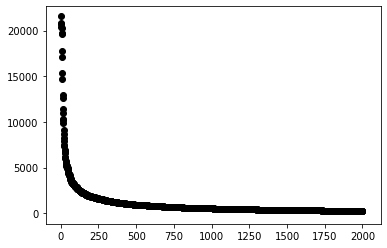

In [186]:
i=1
for (key,value) in vocab:
    if i<2000:
        plt.scatter(i,value,color='black')
        i+=1
plt.show()

In [174]:
plt.show()

In [187]:
clf.score(X_Train,Y_Train)

0.7788891111555645